In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn import decomposition
from sklearn import preprocessing
from scipy.stats import multivariate_normal
from math import pi
from matplotlib.path import Path
import matplotlib.patches as patches
from scipy.interpolate import griddata

colors = plt.cm.tab10.colors
plt.rcParams['font.family'] = ['Helvetica']

# Import force, virtual velocity and virtual displacement profiles

In [3]:
# Load the force, virual displacement and virtual velocity profiles
with open('./data/force','rb') as f:
    force = pickle.load(f)
with open('./data/virtual_displacement','rb') as f:
    virtual_displacement = pickle.load(f)
with open('./data/virtual_velocity','rb') as f:
    virtual_velocity = pickle.load(f)

# Expert score of the trials (from 0 to 3)
Expert_A_score = np.array([3,1,0,2,1,0,3,3,1,2,1,3,0,2,2])
Expert_B_score = np.array([1,2,1,2,3,0,1,2,3,1,3,2,0,3,2])
Expert_C_score = np.array([3,1,0,2,3,0,1,2,3,3,1,2,0,1,3])
Expert_D_score = np.array([1,1,1,2,3,0,2,3,3,2,1,2,0,0,3])

# Subject designators, in order of the trials
subject_names = ['A1','B','C1','D1','E','F','G','A2','H','I','J','D2','C2','K','L','T','SA','SB']

T = 120 # total number of samples per excision used in the analysis
dt = 0.0333 # sampling time
Num_subjects = len(subject_names)
Num_models = Num_subjects
Num_cuts = 12 # number of excisions per trial

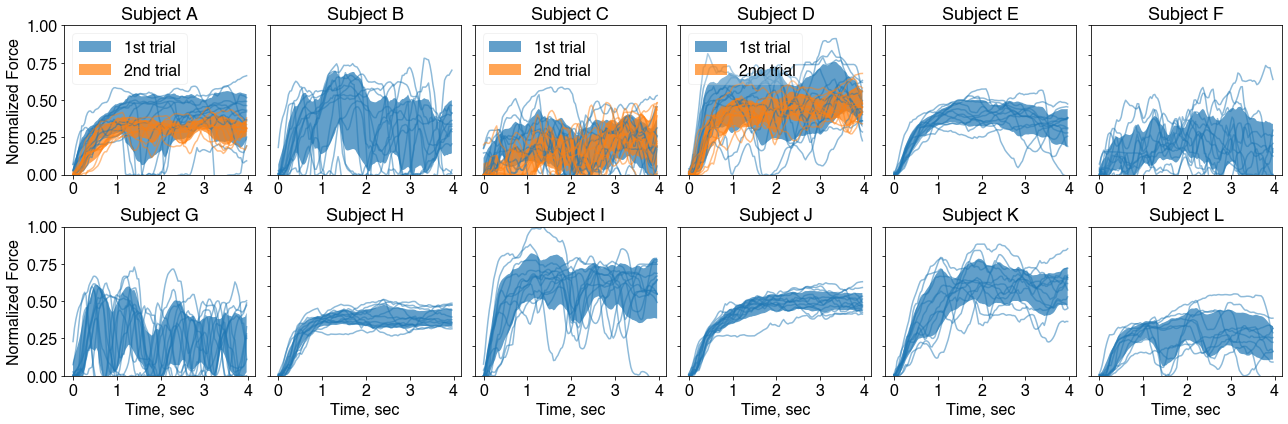

In [4]:
t = np.arange(0,T*dt,dt)

plt.figure(figsize=(18,6))
indx = 1

for subject in [0,1,2,3,4,5,6,8,9,10,13,14]:
    
    plt.subplot(2,6,indx)
    
    if subject == 0:
        data_mean1 = np.mean(force[subject][:,:T],axis=0)
        data_std1 = np.std(force[subject][:,:T],axis=0)
        plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, alpha=0.7,label='1st trial')
#         plt.plot(t,data_mean1)
        for cut in range(force[subject].shape[0]):
            plt.plot(t,force[subject][cut,:T], color='tab:blue',alpha=0.5)
        
        data_mean2 = np.mean(force[7][:,:T],axis=0)
        data_std2 = np.std(force[7][:,:T],axis=0)
        plt.fill_between(t,data_mean2+data_std2,data_mean2-data_std2, alpha=0.7,label='2nd trial')
#         plt.plot(t,data_mean2)
        
        for cut in range(force[7].shape[0]):
            plt.plot(t,force[7][cut,:T], color='tab:orange',alpha=0.5)
        
        plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
        
    elif subject == 2:
        data_mean1 = np.mean(force[subject][:,:T],axis=0)
        data_std1 = np.std(force[subject][:,:T],axis=0)
        plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, alpha=0.7,label='1st trial')
#         plt.plot(t,data_mean1)
        for cut in range(force[subject].shape[0]):
            plt.plot(t,force[subject][cut,:T], color='tab:blue',alpha=0.5)
        
        data_mean2 = np.mean(force[12][:,:T],axis=0)
        data_std2 = np.std(force[12][:,:T],axis=0)
        plt.fill_between(t,data_mean2+data_std2,data_mean2-data_std2, alpha=0.7,label='2nd trial')
#         plt.plot(t,data_mean2)
        
        for cut in range(force[12].shape[0]):
            plt.plot(t,force[12][cut,:T], color='tab:orange',alpha=0.5)
        
        plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
        
    elif subject == 3:
        data_mean1 = np.mean(force[subject][:,:T],axis=0)
        data_std1 = np.std(force[subject][:,:T],axis=0)
        plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, alpha=0.7,label='1st trial')
#         plt.plot(t,data_mean1)
        for cut in range(force[subject].shape[0]):
            plt.plot(t,force[subject][cut,:T], color='tab:blue',alpha=0.5)
        
        data_mean2 = np.mean(force[11][:,:T],axis=0)
        data_std2 = np.std(force[11][:,:T],axis=0)
        plt.fill_between(t,data_mean2+data_std2,data_mean2-data_std2, alpha=0.7,label='2nd trial')
#         plt.plot(t,data_mean2)
        
        for cut in range(force[11].shape[0]):
            plt.plot(t,force[11][cut,:T], color='tab:orange',alpha=0.5)
        
        plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
        
    else:
        data_mean = np.mean(force[subject][:,:T],axis=0)
        data_std = np.std(force[subject][:,:T],axis=0)
        plt.fill_between(t,data_mean+data_std,data_mean-data_std, alpha=0.7)
#         plt.plot(t,data_mean)
        
        for cut in range(force[subject].shape[0]):
            plt.plot(t,force[subject][cut,:T], color='tab:blue',alpha=0.5)
    
    if subject == 0:
        plt.title('Subject A', fontsize=18)
    elif subject == 2:
        plt.title('Subject C', fontsize=18)
    elif subject == 3:
        plt.title('Subject D', fontsize=18)
    else:
        plt.title('Subject '+subject_names[subject], fontsize=18)
        
    if indx >= 7:
        plt.xlabel('Time, sec', fontsize=16)
    if indx in [1,7]:
        plt.ylabel('Normalized Force', fontsize=16)
    plt.ylim([0,1])
#     if subject == 1:
#         plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
    
    plt.tick_params(labelsize=16)
    plt.xticks([0,1,2,3,4])
    if indx not in [1,7]:
        plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0], [])
#     plt.grid(axis='y',alpha=0.4)
    
    indx += 1
    
plt.tight_layout()
plt.savefig('./figures/force_profiles.pdf') 
plt.show()

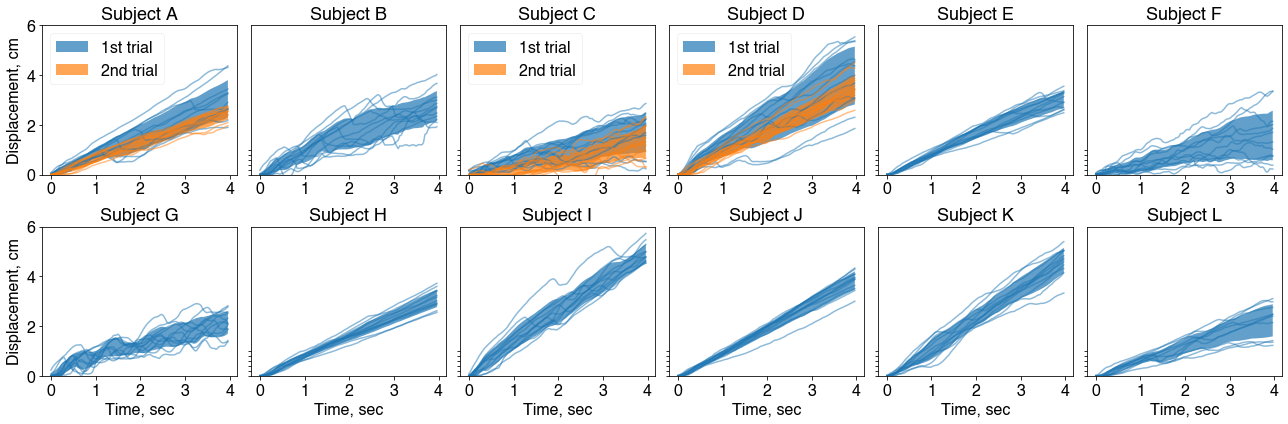

In [5]:
t = np.arange(0,T*dt,dt)

plt.figure(figsize=(18,6))
indx = 1

for subject in [0,1,2,3,4,5,6,8,9,10,13,14]:
    
    plt.subplot(2,6,indx)
    
    if subject == 0:
        data_mean1 = np.mean(virtual_displacement[subject][:,:T],axis=0)
        data_std1 = np.std(virtual_displacement[subject][:,:T],axis=0)
        plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, alpha=0.7,label='1st trial')
#         plt.plot(t,data_mean1)
        for cut in range(virtual_displacement[subject].shape[0]):
            plt.plot(t,virtual_displacement[subject][cut,:T], color='tab:blue',alpha=0.5)
        
        data_mean2 = np.mean(virtual_displacement[7][:,:T],axis=0)
        data_std2 = np.std(virtual_displacement[7][:,:T],axis=0)
        plt.fill_between(t,data_mean2+data_std2,data_mean2-data_std2, alpha=0.7,label='2nd trial')
#         plt.plot(t,data_mean2)
        
        for cut in range(virtual_displacement[7].shape[0]):
            plt.plot(t,virtual_displacement[7][cut,:T], color='tab:orange',alpha=0.5)
        
        plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
        
    elif subject == 2:
        data_mean1 = np.mean(virtual_displacement[subject][:,:T],axis=0)
        data_std1 = np.std(virtual_displacement[subject][:,:T],axis=0)
        plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, alpha=0.7,label='1st trial')
#         plt.plot(t,data_mean1)
        for cut in range(virtual_displacement[subject].shape[0]):
            plt.plot(t,virtual_displacement[subject][cut,:T], color='tab:blue',alpha=0.5)
        
        data_mean2 = np.mean(virtual_displacement[12][:,:T],axis=0)
        data_std2 = np.std(virtual_displacement[12][:,:T],axis=0)
        plt.fill_between(t,data_mean2+data_std2,data_mean2-data_std2, alpha=0.7,label='2nd trial')
#         plt.plot(t,data_mean2)
        
        for cut in range(virtual_displacement[12].shape[0]):
            plt.plot(t,virtual_displacement[12][cut,:T], color='tab:orange',alpha=0.5)
        
        plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
        
    elif subject == 3:
        data_mean1 = np.mean(virtual_displacement[subject][:,:T],axis=0)
        data_std1 = np.std(virtual_displacement[subject][:,:T],axis=0)
        plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, alpha=0.7,label='1st trial')
#         plt.plot(t,data_mean1)
        for cut in range(virtual_displacement[subject].shape[0]):
            plt.plot(t,virtual_displacement[subject][cut,:T], color='tab:blue',alpha=0.5)
        
        data_mean2 = np.mean(virtual_displacement[11][:,:T],axis=0)
        data_std2 = np.std(virtual_displacement[11][:,:T],axis=0)
        plt.fill_between(t,data_mean2+data_std2,data_mean2-data_std2, alpha=0.7,label='2nd trial')
#         plt.plot(t,data_mean2)
        
        for cut in range(virtual_displacement[11].shape[0]):
            plt.plot(t,virtual_displacement[11][cut,:T], color='tab:orange',alpha=0.5)
        
        plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
        
    else:
        data_mean = np.mean(virtual_displacement[subject][:,:T],axis=0)
        data_std = np.std(virtual_displacement[subject][:,:T],axis=0)
        plt.fill_between(t,data_mean+data_std,data_mean-data_std, alpha=0.7)
#         plt.plot(t,data_mean)
        
        for cut in range(virtual_displacement[subject].shape[0]):
            plt.plot(t,virtual_displacement[subject][cut,:T], color='tab:blue',alpha=0.5)
    
    if subject == 0:
        plt.title('Subject A', fontsize=18)
    elif subject == 2:
        plt.title('Subject C', fontsize=18)
    elif subject == 3:
        plt.title('Subject D', fontsize=18)
    else:
        plt.title('Subject '+subject_names[subject], fontsize=18)
        
    if indx >= 7:
        plt.xlabel('Time, sec', fontsize=16)
    if indx in [1,7]:
        plt.ylabel('Displacement, cm', fontsize=16)
    plt.ylim([0,6])
#     if subject == 1:
#         plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
    
    plt.tick_params(labelsize=16)
    plt.xticks([0,1,2,3,4])
    if indx not in [1,7]:
        plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0], [])
#     plt.grid(axis='y',alpha=0.4)
    
    indx += 1
    
plt.tight_layout()
plt.savefig('./figures/virtual_displacement_profiles.pdf') 
plt.show()

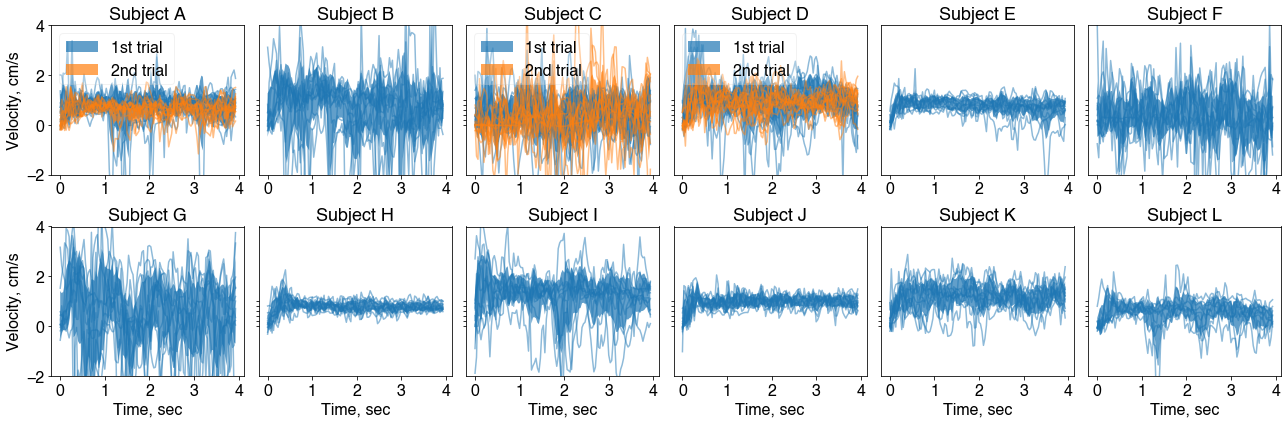

In [6]:
t = np.arange(0,(T-1)*dt,dt)

plt.figure(figsize=(18,6))
indx = 1

for subject in [0,1,2,3,4,5,6,8,9,10,13,14]:
    
    plt.subplot(2,6,indx)
    
    if subject == 0:
        data_mean1 = np.mean(virtual_velocity[subject][:,:T-1],axis=0)
        data_std1 = np.std(virtual_velocity[subject][:,:T-1],axis=0)
        plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, alpha=0.7,label='1st trial')
#         plt.plot(t,data_mean1)
        for cut in range(virtual_velocity[subject].shape[0]):
            plt.plot(t,virtual_velocity[subject][cut,:T-1], color='tab:blue',alpha=0.5)
        
        data_mean2 = np.mean(virtual_velocity[7][:,:T-1],axis=0)
        data_std2 = np.std(virtual_velocity[7][:,:T-1],axis=0)
        plt.fill_between(t,data_mean2+data_std2,data_mean2-data_std2, alpha=0.7,label='2nd trial')
#         plt.plot(t,data_mean2)
        
        for cut in range(virtual_velocity[7].shape[0]):
            plt.plot(t,virtual_velocity[7][cut,:T-1], color='tab:orange',alpha=0.5)
        
        plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
        
    elif subject == 2:
        data_mean1 = np.mean(virtual_velocity[subject][:,:T-1],axis=0)
        data_std1 = np.std(virtual_velocity[subject][:,:T-1],axis=0)
        plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, alpha=0.7,label='1st trial')
#         plt.plot(t,data_mean1)
        for cut in range(virtual_velocity[subject].shape[0]):
            plt.plot(t,virtual_velocity[subject][cut,:T-1], color='tab:blue',alpha=0.5)
        
        data_mean2 = np.mean(virtual_velocity[12][:,:T-1],axis=0)
        data_std2 = np.std(virtual_velocity[12][:,:T-1],axis=0)
        plt.fill_between(t,data_mean2+data_std2,data_mean2-data_std2, alpha=0.7,label='2nd trial')
#         plt.plot(t,data_mean2)
        
        for cut in range(virtual_velocity[12].shape[0]):
            plt.plot(t,virtual_velocity[12][cut,:T-1], color='tab:orange',alpha=0.5)
        
        plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
        
    elif subject == 3:
        data_mean1 = np.mean(virtual_velocity[subject][:,:T-1],axis=0)
        data_std1 = np.std(virtual_velocity[subject][:,:T-1],axis=0)
        plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, alpha=0.7,label='1st trial')
#         plt.plot(t,data_mean1)
        for cut in range(virtual_velocity[subject].shape[0]):
            plt.plot(t,virtual_velocity[subject][cut,:T-1], color='tab:blue',alpha=0.5)
        
        data_mean2 = np.mean(virtual_velocity[11][:,:T-1],axis=0)
        data_std2 = np.std(virtual_velocity[11][:,:T-1],axis=0)
        plt.fill_between(t,data_mean2+data_std2,data_mean2-data_std2, alpha=0.7,label='2nd trial')
#         plt.plot(t,data_mean2)
        
        for cut in range(virtual_velocity[11].shape[0]):
            plt.plot(t,virtual_velocity[11][cut,:T-1], color='tab:orange',alpha=0.5)
        
        plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
        
    else:
        data_mean = np.mean(virtual_velocity[subject][:,:T-1],axis=0)
        data_std = np.std(virtual_velocity[subject][:,:T-1],axis=0)
        plt.fill_between(t,data_mean+data_std,data_mean-data_std, alpha=0.7)
#         plt.plot(t,data_mean)
        
        for cut in range(virtual_velocity[subject].shape[0]):
            plt.plot(t,virtual_velocity[subject][cut,:T-1], color='tab:blue',alpha=0.5)
    
    if subject == 0:
        plt.title('Subject A', fontsize=18)
    elif subject == 2:
        plt.title('Subject C', fontsize=18)
    elif subject == 3:
        plt.title('Subject D', fontsize=18)
    else:
        plt.title('Subject '+subject_names[subject], fontsize=18)
        
    if indx >= 7:
        plt.xlabel('Time, sec', fontsize=16)
    if indx in [1,7]:
        plt.ylabel('Velocity, cm/s', fontsize=16)
    plt.ylim([-2,4])
#     if subject == 1:
#         plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
    
    plt.tick_params(labelsize=16)
    plt.xticks([0,1,2,3,4])
    if indx not in [1,7]:
        plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0], [])
#     plt.grid(axis='y',alpha=0.4)
    
    indx += 1
    
plt.tight_layout()
plt.savefig('./figures/virtual_velocity_profiles.pdf') 
plt.show()

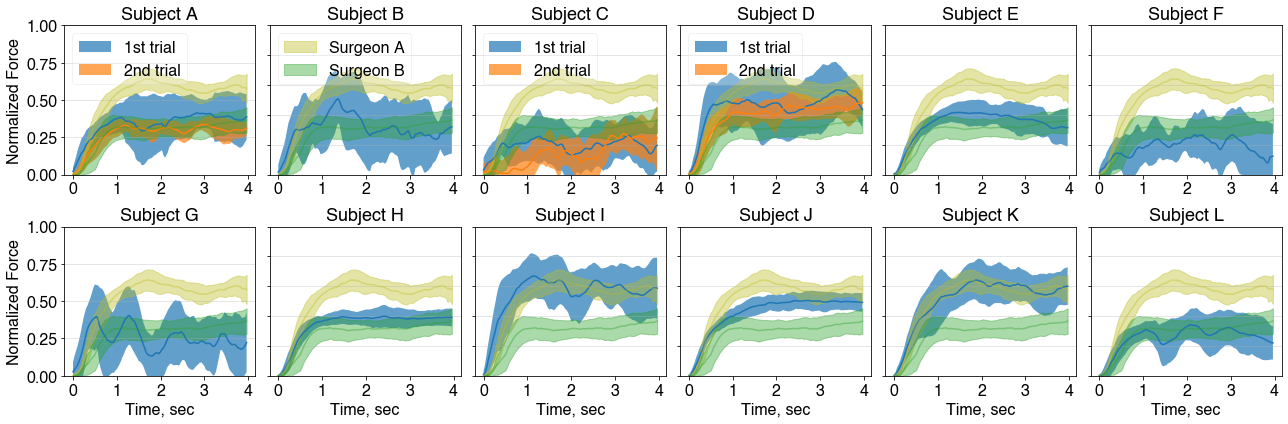

In [7]:
t = np.arange(0,T*dt,dt)

plt.figure(figsize=(18,6))
indx = 1

for subject in [0,1,2,3,4,5,6,8,9,10,13,14]:
    
    plt.subplot(2,6,indx)
    
    if subject == 0:
        data_mean1 = np.mean(force[subject][:,:T],axis=0)
        data_std1 = np.std(force[subject][:,:T],axis=0)
        plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, alpha=0.7,label='1st trial')
        plt.plot(t,data_mean1)
#         for cut in range(force[subject].shape[0]):
#             plt.plot(t,force[subject][cut,:T], color='tab:blue',alpha=0.7)
        
        data_mean2 = np.mean(force[7][:,:T],axis=0)
        data_std2 = np.std(force[7][:,:T],axis=0)
        plt.fill_between(t,data_mean2+data_std2,data_mean2-data_std2, alpha=0.7,label='2nd trial')
        plt.plot(t,data_mean2)
#         for cut in range(force[7].shape[0]):
#             plt.plot(t,force[7][cut,:T], color='tab:orange',alpha=0.7)
        
        plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
        
    elif subject == 2:
        data_mean1 = np.mean(force[subject][:,:T],axis=0)
        data_std1 = np.std(force[subject][:,:T],axis=0)
        plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, alpha=0.7,label='1st trial')
        plt.plot(t,data_mean1)
#         for cut in range(force[subject].shape[0]):
#             plt.plot(t,force[subject][cut,:T], color='tab:blue',alpha=0.7)
        
        data_mean2 = np.mean(force[12][:,:T],axis=0)
        data_std2 = np.std(force[12][:,:T],axis=0)
        plt.fill_between(t,data_mean2+data_std2,data_mean2-data_std2, alpha=0.7,label='2nd trial')
        plt.plot(t,data_mean2)
#         for cut in range(force[12].shape[0]):
#             plt.plot(t,force[12][cut,:T], color='tab:orange',alpha=0.7)
        
        plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
        
    elif subject == 3:
        data_mean1 = np.mean(force[subject][:,:T],axis=0)
        data_std1 = np.std(force[subject][:,:T],axis=0)
        plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, alpha=0.7,label='1st trial')
        plt.plot(t,data_mean1)
#         for cut in range(force[subject].shape[0]):
#             plt.plot(t,force[subject][cut,:T], color='tab:blue',alpha=0.7)
        
        data_mean2 = np.mean(force[11][:,:T],axis=0)
        data_std2 = np.std(force[11][:,:T],axis=0)
        plt.fill_between(t,data_mean2+data_std2,data_mean2-data_std2, alpha=0.7,label='2nd trial')
        plt.plot(t,data_mean2)
#         for cut in range(force[11].shape[0]):
#             plt.plot(t,force[11][cut,:T], color='tab:orange',alpha=0.7)
        
        plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
        
    else:
        data_mean = np.mean(force[subject][:,:T],axis=0)
        data_std = np.std(force[subject][:,:T],axis=0)
        plt.fill_between(t,data_mean+data_std,data_mean-data_std, alpha=0.7)
        plt.plot(t,data_mean)
#         for cut in range(force[subject].shape[0]):
#             plt.plot(t,force[subject][cut,:T], color='tab:blue',alpha=0.7)
        
    Surgeon_B_mean = np.mean(force[17][:,:T],axis=0)
    Surgeon_B_std = np.std(force[17][:,:T],axis=0)
    
    Surgeon_A_mean = np.mean(force[16][:,:T],axis=0)
    Surgeon_A_std = np.std(force[16][:,:T],axis=0)
    
    plt.fill_between(t,Surgeon_A_mean+Surgeon_A_std,Surgeon_A_mean-Surgeon_A_std, alpha=0.4, color='tab:olive', label='Surgeon A')
    plt.plot(t,Surgeon_A_mean, color='tab:olive', alpha=0.4)
    
    plt.fill_between(t,Surgeon_B_mean+Surgeon_B_std,Surgeon_B_mean-Surgeon_B_std, alpha=0.4, color='tab:green', label='Surgeon B')
    plt.plot(t,Surgeon_B_mean,color='tab:green', alpha=0.4)
    
    if subject == 0:
        plt.title('Subject A', fontsize=18)
    elif subject == 2:
        plt.title('Subject C', fontsize=18)
    elif subject == 3:
        plt.title('Subject D', fontsize=18)
    else:
        plt.title('Subject '+subject_names[subject], fontsize=18)
    
    if indx >= 7:
        plt.xlabel('Time, sec', fontsize=16)
    if indx in [1,7]:
        plt.ylabel('Normalized Force', fontsize=16)
    plt.ylim([0,1])
    if subject == 1:
        plt.legend(loc='upper left',fontsize=16,framealpha=0.25)
    
    plt.tick_params(labelsize=16)
    plt.xticks([0,1,2,3,4])
    if indx not in [1,7]:
        plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0], [])
    plt.grid(axis='y',alpha=0.4)
    
    indx += 1
    
plt.tight_layout()
plt.savefig('./figures/force_distributions.pdf') 
plt.show()

# Force-based metrics

In [8]:
force_mean = np.zeros(Num_subjects)
mean_force_variance = np.zeros(Num_subjects)
mean_force_integral = np.zeros(Num_subjects)
mean_force_derivative_metric = np.zeros(Num_subjects)
mean_force_derivative = np.zeros(Num_subjects)
mean_force_normalized = np.zeros(Num_subjects)
mean_force_peak = np.zeros(Num_subjects)
profile_variance_mean = np.zeros(Num_subjects)

force_mean_sd = np.zeros(Num_subjects)
force_variance_sd = np.zeros(Num_subjects)
force_integral_sd = np.zeros(Num_subjects)
force_derivative_metric_sd = np.zeros(Num_subjects)
force_derivative_mean_sd = np.zeros(Num_subjects)
force_normalized_sd = np.zeros(Num_subjects)
force_peak_sd = np.zeros(Num_subjects)
profile_variance_std = np.zeros(Num_subjects)

for subject in range(Num_subjects):
    
    force_mean[subject] = np.mean(np.mean(force[subject][:,:T],axis=1))
    mean_force_variance[subject] = np.mean(np.var(force[subject][:,:T],axis=1))
    mean_force_integral[subject] = np.mean(np.cumsum(force[subject][:,:T],axis=1)[:,-1])
    mean_force_derivative_metric[subject] = np.mean(np.sqrt(np.cumsum((np.diff(force[subject][:,:T],axis=1)/dt)**2,axis=1)[:,-1]))
    mean_force_derivative[subject] = np.mean(np.mean(np.diff(force[subject][:,:T],axis=1),axis=1))
    mean_force_normalized[subject] = np.mean(np.mean(force[subject][:,:T],axis=1)/np.max(force[subject][:,:T],axis=1))
    mean_force_peak[subject] = np.mean(np.max(force[subject][:,:T],axis=1))
    profile_variance_mean[subject] = np.mean(np.var(force[subject][:,:T],axis=0))
    
    force_mean_sd[subject] = np.std(np.mean(force[subject][:,:T],axis=1))
    force_variance_sd[subject] = np.std(np.var(force[subject][:,:T],axis=1))
    force_integral_sd[subject] = np.std(np.cumsum(force[subject][:,:T],axis=1)[:,-1])
    force_derivative_metric_sd[subject] = np.std(np.sqrt(np.cumsum((np.diff(force[subject][:,:T],axis=1)/dt)**2,axis=1)[:,-1]))
    force_derivative_mean_sd[subject] = np.std(np.mean(np.diff(force[subject][:,:T],axis=1),axis=1))
    force_normalized_sd[subject] = np.std(np.mean(force[subject][:,:T],axis=1)/np.max(force[subject][:,:T],axis=1))
    force_peak_sd[subject] = np.std(np.max(force[subject][:,:T],axis=1))
    profile_variance_std[subject] = np.std(np.var(force[subject][:,:T],axis=0))

Subject J
(Normalized) Force mean: 0.42 +/- 0.04
Mean force variability: 0.02 +/- 0.01
Mean force integral: 50.63 +/- 4.93
Mean force derivative metric: 3.7 +/- 0.37
Mean force derivative: 0.0041 +/- 0.0005
Normalized force: 0.78 +/- 0.04
Mean force peak: 0.54 +/- 0.05
Mean force profile variability: 0.056 +/- 0.031


Text(0.5, 0, 'samples')

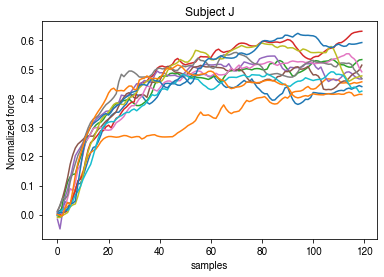

In [9]:
subject_of_interest = 'J'
indx = np.where(np.array(subject_names)==subject_of_interest)[0][0]

print('Subject '+subject_of_interest)
print('(Normalized) Force mean: '+str(round(force_mean[indx],2))+ ' +/- ' + str(round(force_mean_sd[indx],2)))
print('Mean force variability: '+str(round(mean_force_variance[indx],2))+ ' +/- ' + str(round(force_variance_sd[indx],2)))
print('Mean force integral: '+str(round(mean_force_integral[indx],2))+ ' +/- ' + str(round(force_integral_sd[indx],2)))
print('Mean force derivative metric: '+str(round(mean_force_derivative_metric[indx],2))+ ' +/- ' + str(round(force_derivative_metric_sd[indx],2)))
print('Mean force derivative: '+str(round(mean_force_derivative[indx],4))+ ' +/- ' + str(round(force_derivative_mean_sd[indx],4)))
print('Normalized force: '+str(round(mean_force_normalized[indx],2))+ ' +/- ' + str(round(force_normalized_sd[indx],2)))
print('Mean force peak: '+str(round(mean_force_peak[indx],2))+ ' +/- ' + str(round(force_peak_sd[indx],2)))
print('Mean force profile variability: '+str(round(np.sqrt(profile_variance_mean[indx]),3))+ ' +/- ' + str(round(np.sqrt(profile_variance_std[indx]),3)))

for cut in range(force[indx].shape[0]):
    plt.plot(force[indx][cut,:T])

plt.title('Subject '+subject_names[indx])
plt.ylabel('Normalized force')
plt.xlabel('samples')

# Expert score boxplots

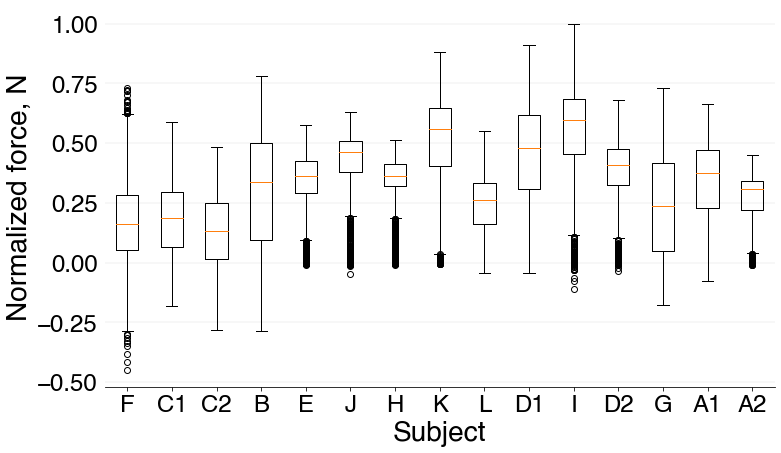

In [10]:
fig, ax = plt.subplots(1,1,figsize=(12, 7))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none') # Remove y-axis tick marks
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5) # Add major gridlines in the y-axis
ax.set_ylabel('Normalized force, N',fontsize=28)
ax.set_xlabel('Subject',fontsize=28)

dataset = []
labels_expert_A = []

# Sort by evaluation score
for subject in [5,2,12,1,4,10,8,13,14,3,9,11,6,0,7]: # index
    dataset.append(force[subject][:,:T].reshape(-1))
    labels_expert_A.append(subject_names[subject])
ax.boxplot(dataset,labels=labels_expert_A)
ax.tick_params(axis='both', labelsize=24)

plt.savefig('./figures/Expert_A_boxplot.pdf') 
plt.show()

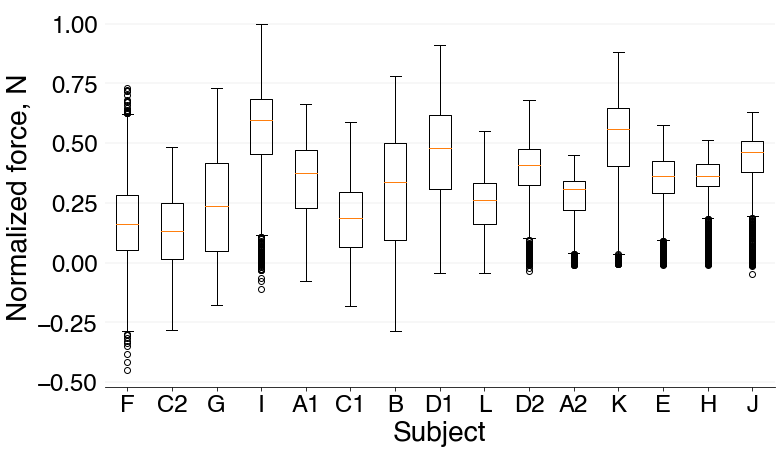

In [11]:
fig, ax = plt.subplots(1,1,figsize=(12, 7))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none') # Remove y-axis tick marks
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5) # Add major gridlines in the y-axis
ax.set_ylabel('Normalized force, N',fontsize=28)
ax.set_xlabel('Subject',fontsize=28)

dataset = []
labels_expert_B = []

# Sort by evaluation score
for subject in [5,12,6,9,0,2,1,3,14,11,7,13,4,8,10]: # index
    dataset.append(force[subject][:,:T].reshape(-1))
    labels_expert_B.append(subject_names[subject])
ax.boxplot(dataset,labels=labels_expert_B)
ax.tick_params(axis='both', labelsize=24)

plt.savefig('./figures/Expert_B_boxplot.pdf') 
plt.show()

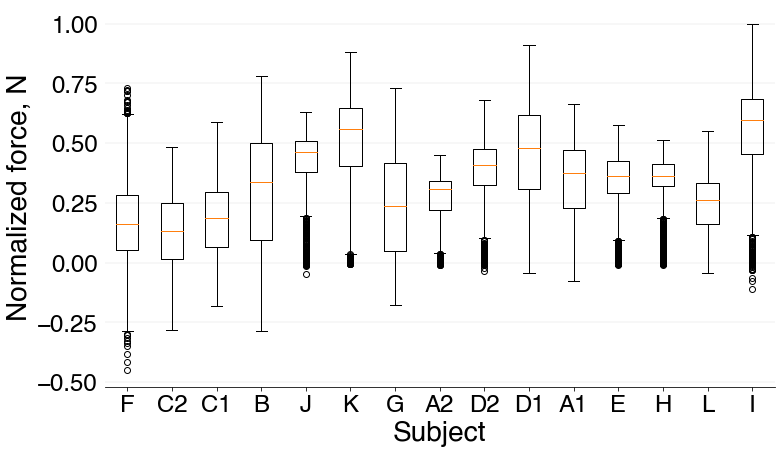

In [12]:
fig, ax = plt.subplots(1,1,figsize=(12, 7))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none') # Remove y-axis tick marks
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5) # Add major gridlines in the y-axis
ax.set_ylabel('Normalized force, N',fontsize=28)
ax.set_xlabel('Subject',fontsize=28)

dataset = []
labels_expert_C = []

# Sort by evaluation score
for subject in [5,12,2,1,10,13,6,7,11,3,0,4,8,14,9]: # index
    dataset.append(force[subject][:,:T].reshape(-1))
    labels_expert_C.append(subject_names[subject])
ax.boxplot(dataset,labels=labels_expert_C)
ax.tick_params(axis='both', labelsize=24)

plt.savefig('./figures/Expert_C_boxplot.pdf') 
plt.show()

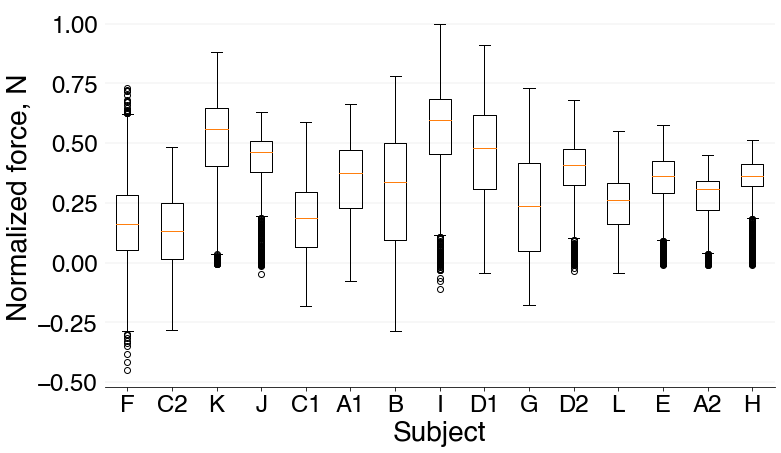

In [13]:
fig, ax = plt.subplots(1,1,figsize=(12, 7))

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none') # Remove y-axis tick marks
ax.grid(color='grey', axis='y', linestyle='-', linewidth=0.25, alpha=0.5) # Add major gridlines in the y-axis
ax.set_ylabel('Normalized force, N',fontsize=28)
ax.set_xlabel('Subject',fontsize=28)

dataset = []
labels_expert_D = []

# Sort by evaluation score
for subject in [5,12,13,10,2,0,1,9,3,6,11,14,4,7,8]: # index
    dataset.append(force[subject][:,:T].reshape(-1))
    labels_expert_D.append(subject_names[subject])
ax.boxplot(dataset,labels=labels_expert_D)
ax.tick_params(axis='both', labelsize=24)

plt.savefig('./figures/Expert_D_boxplot.pdf') 
plt.show()

# Relationships between the force-based metrics and expert score 

In [14]:
# Levene's test for equality of variances
from scipy.stats import levene

stat, p = levene(force[0].reshape(-1),force[1].reshape(-1),force[2].reshape(-1),force[3].reshape(-1),
                 force[4].reshape(-1),force[5].reshape(-1),force[6].reshape(-1),force[7].reshape(-1),
                 force[8].reshape(-1),force[9].reshape(-1),force[10].reshape(-1),force[11].reshape(-1),
                 force[12].reshape(-1),force[13].reshape(-1),force[14].reshape(-1),force[15].reshape(-1),
                 force[16].reshape(-1),force[17].reshape(-1))
print(p)

0.0


In [15]:
import pingouin as pg
from pingouin import welch_anova
import pandas as pd

# groups = list of data arrays
def gameshowell(groups):

    num_groups = len(groups)
    group_len = np.zeros(num_groups,dtype='uint32')
    N_total = 0

    for g in range(num_groups):
        group_len[g] = groups[g].shape[0]
        N_total += groups[g].shape[0]

    indx = np.arange(1,N_total)

    label = []
    for g in range(num_groups):
        for i in range(group_len[g]):
            label.append(g)

    data = groups[0]
    for g in np.arange(1,num_groups):
        data = np.hstack((data,groups[g]))

    recdata = np.rec.array([(indx[0],label[0],data[0])],
                           dtype=[('idx', '<i4'),('group', '<i4'),('force', '<f4')])
    for i in range(1,len(label)-1):
        rec_ = np.rec.array([(indx[i],label[i],data[i])],
                            dtype=[('idx', '<i4'),('group', '<i4'),('force', '<f4')])
        recdata = np.hstack(( recdata, rec_ ))

    df = pd.DataFrame(recdata); df = df.set_index('idx')

    aov = welch_anova(dv='force', between='group', data=df)
    print('Welchs ANOVA test')
    print(aov)
    print()

    res = pg.pairwise_gameshowell(data=df, dv='force',between='group').round(3)
    print('Games-Howell post-hoc')
    print(res)
    print()
    print()

C:\Users\honeycomb0\Miniconda3\envs\main\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


### Expert score vs mean force

C:\Users\honeycomb0\Miniconda3\envs\main\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


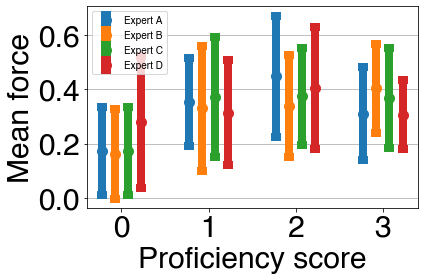

Expert A
Welchs ANOVA test
  Source  ddof1         ddof2            F  p-unc       np2
0  group      3  11318.088876  1860.348121    0.0  0.211693

Games-Howell post-hoc
   A  B  mean(A)  mean(B)   diff     se       T         df   pval  hedges
0  0  1    0.172    0.354 -0.182  0.003 -55.459   9087.195  0.001  -1.125
1  0  2    0.172    0.447 -0.275  0.004 -70.586   9689.914  0.001  -1.445
2  0  3    0.172    0.310 -0.138  0.003 -40.668   9252.191  0.001  -0.837
3  1  2    0.354    0.447 -0.094  0.004 -25.370  10045.139  0.001  -0.478
4  1  3    0.354    0.310  0.043  0.003  13.750  11009.562  0.001   0.260
5  2  3    0.447    0.310  0.137  0.004  36.052  10315.294  0.001   0.690


Expert B
Welchs ANOVA test
  Source  ddof1        ddof2           F  p-unc       np2
0  group      3  9678.283939  1363.72265    0.0  0.125174

Games-Howell post-hoc
   A  B  mean(A)  mean(B)   diff     se       T         df   pval  hedges
0  0  1    0.162    0.330 -0.168  0.004 -38.286   7341.822  0.001  -0.

In [16]:
# Expert A score groups
Expert_A_group_0 = np.hstack((force[2][:,:T].reshape(-1),force[5][:,:T].reshape(-1),force[12][:,:T].reshape(-1)))
Expert_A_group_1 = np.hstack((force[1][:,:T].reshape(-1),force[4][:,:T].reshape(-1),
                              force[10][:,:T].reshape(-1),force[8][:,:T].reshape(-1)))
Expert_A_group_2 = np.hstack((force[13][:,:T].reshape(-1),force[14][:,:T].reshape(-1),
                              force[3][:,:T].reshape(-1),force[9][:,:T].reshape(-1)))
Expert_A_group_3 = np.hstack((force[11][:,:T].reshape(-1),force[6][:,:T].reshape(-1),
                              force[0][:,:T].reshape(-1),force[7][:,:T].reshape(-1)))

# Expert B score groups
Expert_B_group_0 = np.hstack((force[5][:,:T].reshape(-1),force[12][:,:T].reshape(-1)))
Expert_B_group_1 = np.hstack((force[0][:,:T].reshape(-1),force[2][:,:T].reshape(-1),
                              force[6][:,:T].reshape(-1),force[9][:,:T].reshape(-1)))
Expert_B_group_2 = np.hstack((force[1][:,:T].reshape(-1),force[3][:,:T].reshape(-1),
                              force[7][:,:T].reshape(-1),force[11][:,:T].reshape(-1),force[14][:,:T].reshape(-1)))
Expert_B_group_3 = np.hstack((force[4][:,:T].reshape(-1),force[8][:,:T].reshape(-1),
                              force[10][:,:T].reshape(-1),force[13][:,:T].reshape(-1)))

# Expert C score groups
Expert_C_group_0 = np.hstack((force[5][:,:T].reshape(-1),force[12][:,:T].reshape(-1),force[2][:,:T].reshape(-1)))
Expert_C_group_1 = np.hstack((force[1][:,:T].reshape(-1),force[10][:,:T].reshape(-1),
                              force[13][:,:T].reshape(-1),force[6][:,:T].reshape(-1)))
Expert_C_group_2 = np.hstack((force[7][:,:T].reshape(-1),force[11][:,:T].reshape(-1),force[3][:,:T].reshape(-1)))
Expert_C_group_3 = np.hstack((force[0][:,:T].reshape(-1),force[4][:,:T].reshape(-1),
                              force[8][:,:T].reshape(-1),force[14][:,:T].reshape(-1),force[9][:,:T].reshape(-1)))

# Expert D score groups
Expert_D_group_0 = np.hstack((force[5][:,:T].reshape(-1),force[12][:,:T].reshape(-1),force[13][:,:T].reshape(-1)))
Expert_D_group_1 = np.hstack((force[10][:,:T].reshape(-1),force[2][:,:T].reshape(-1),
                              force[0][:,:T].reshape(-1),force[1][:,:T].reshape(-1)))
Expert_D_group_2 = np.hstack((force[9][:,:T].reshape(-1),force[3][:,:T].reshape(-1),
                              force[6][:,:T].reshape(-1),force[11][:,:T].reshape(-1)))
Expert_D_group_3 = np.hstack((force[14][:,:T].reshape(-1),force[4][:,:T].reshape(-1),
                              force[7][:,:T].reshape(-1),force[8][:,:T].reshape(-1)))

plt.errorbar(np.array([0,1,2,3]),[np.mean(Expert_A_group_0),np.mean(Expert_A_group_1),
                                  np.mean(Expert_A_group_2),np.mean(Expert_A_group_3)],
             yerr=[np.std(Expert_A_group_0),np.std(Expert_A_group_1),np.std(Expert_A_group_2),np.std(Expert_A_group_3)],fmt='o',
             capsize=5,markersize=10,capthick=8,label='Expert A',lw=8)
plt.errorbar([0.15,1.15,2.15,3.15],[np.mean(Expert_B_group_0),np.mean(Expert_B_group_1),np.mean(Expert_B_group_2),np.mean(Expert_B_group_3)],
             yerr=[np.std(Expert_B_group_0),np.std(Expert_B_group_1),np.std(Expert_B_group_2),np.std(Expert_B_group_3)],fmt='o',
             capsize=5,markersize=10,capthick=8,label='Expert B',lw=8)
plt.errorbar([0.3,1.3,2.3,3.3],[np.mean(Expert_C_group_0),np.mean(Expert_C_group_1),np.mean(Expert_C_group_2),np.mean(Expert_C_group_3)],
             yerr=[np.std(Expert_C_group_0),np.std(Expert_C_group_1),np.std(Expert_C_group_2),np.std(Expert_C_group_3)],fmt='o',
             capsize=5,markersize=10,capthick=8,label='Expert C',lw=8)
plt.errorbar([0.45,1.45,2.45,3.45],[np.mean(Expert_D_group_0),np.mean(Expert_D_group_1),np.mean(Expert_D_group_2),np.mean(Expert_D_group_3)],
             yerr=[np.std(Expert_D_group_0),np.std(Expert_D_group_1),np.std(Expert_D_group_2),np.std(Expert_D_group_3)],fmt='o',
             capsize=5,markersize=10,capthick=8,label='Expert D',lw=8)

plt.xticks([0.225,1.225,2.225,3.225],labels=['0','1','2','3'],fontsize=30)
plt.yticks([0.0,0.2,0.4,0.6],fontsize=30)
plt.xlabel('Proficiency score',fontsize=30)
plt.ylabel('Mean force',fontsize=30)
plt.grid(axis='y')
plt.tight_layout()
plt.legend()
plt.show()

print('Expert A')
gameshowell([Expert_A_group_0,Expert_A_group_1,Expert_A_group_2,Expert_A_group_3])

print('Expert B')
gameshowell([Expert_B_group_0,Expert_B_group_1,Expert_B_group_2,Expert_B_group_3])

print('Expert C')
gameshowell([Expert_C_group_0,Expert_C_group_1,Expert_C_group_2,Expert_C_group_3])

print('Expert D')
gameshowell([Expert_D_group_0,Expert_D_group_1,Expert_D_group_2,Expert_D_group_3])

### Expert score vs force variability

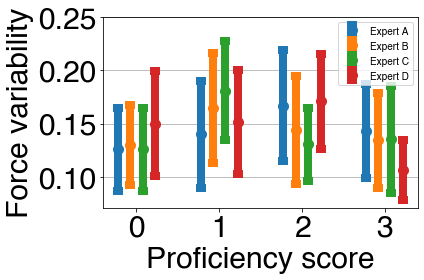

Expert A
Welchs ANOVA test
  Source  ddof1      ddof2          F         p-unc       np2
0  group      3  262.29903  74.109446  9.535860e-35  0.360093

Games-Howell post-hoc
   A  B  mean(A)  mean(B)   diff     se       T       df   pval  hedges
0  0  1    0.150    0.129  0.022  0.004   6.102  237.366  0.001   0.785
1  0  2    0.150    0.188 -0.038  0.004  -9.280  229.941  0.001  -1.194
2  0  3    0.150    0.151 -0.001  0.003  -0.210  231.114  0.900  -0.027
3  1  2    0.129    0.188 -0.059  0.004 -14.946  225.383  0.001  -1.923
4  1  3    0.129    0.151 -0.022  0.003  -6.828  234.224  0.001  -0.881
5  2  3    0.188    0.151  0.037  0.004   9.674  212.913  0.001   1.248


Expert B
Welchs ANOVA test
  Source  ddof1      ddof2           F         p-unc       np2
0  group      3  262.04201  220.829133  1.995799e-71  0.565689

Games-Howell post-hoc
   A  B  mean(A)  mean(B)   diff     se       T       df   pval  hedges
0  0  1    0.148    0.217 -0.069  0.005 -14.266  237.282  0.001  -1.836


In [17]:
# Expert A score groups
Expert_A_group_0 = np.vstack((force[2][:,:T],force[5][:,:T],force[12][:,:T]))
Expert_A_group_1 = np.vstack((force[1][:,:T],force[4][:,:T],
                force[10][:,:T],force[8][:,:T]))
Expert_A_group_2 = np.vstack((force[13][:,:T],force[14][:,:T],
                force[3][:,:T],force[9][:,:T]))
Expert_A_group_3 = np.vstack((force[11][:,:T],force[6][:,:T],
                force[0][:,:T],force[7][:,:T]))

# Expert B score groups
Expert_B_group_0 = np.vstack((force[5][:,:T],force[12][:,:T]))
Expert_B_group_1 = np.vstack((force[0][:,:T],force[2][:,:T],
                force[6][:,:T],force[9][:,:T]))
Expert_B_group_2 = np.vstack((force[1][:,:T],force[3][:,:T],
                force[7][:,:T],force[11][:,:T],force[14][:,:T]))
Expert_B_group_3 = np.vstack((force[4][:,:T],force[8][:,:T],
                force[10][:,:T],force[13][:,:T]))

# Expert C score groups
Expert_C_group_0 = np.vstack((force[5][:,:T],force[12][:,:T],force[2][:,:T]))
Expert_C_group_1 = np.vstack((force[1][:,:T],force[10][:,:T],
                force[13][:,:T],force[6][:,:T]))
Expert_C_group_2 = np.vstack((force[7][:,:T],force[11][:,:T],force[3][:,:T]))
Expert_C_group_3 = np.vstack((force[0][:,:T],force[4][:,:T],
                force[8][:,:T],force[14][:,:T],force[9][:,:T]))

# Expert D score groups
Expert_D_group_0 = np.vstack((force[5][:,:T],force[12][:,:T],force[13][:,:T]))
Expert_D_group_1 = np.vstack((force[10][:,:T],force[2][:,:T],
                force[0][:,:T],force[1][:,:T]))
Expert_D_group_2 = np.vstack((force[9][:,:T],force[3][:,:T],
                force[6][:,:T],force[11][:,:T]))
Expert_D_group_3 = np.vstack((force[14][:,:T],force[4][:,:T],
                force[7][:,:T],force[8][:,:T]))

plt.errorbar([0,1,2,3],[np.mean(np.std(Expert_A_group_0,axis=1)),np.mean(np.std(Expert_A_group_1,axis=1)),
                        np.mean(np.std(Expert_A_group_2,axis=1)),np.mean(np.std(Expert_A_group_3,axis=1))],
             yerr=[np.std(np.std(Expert_A_group_0,axis=1)),np.std(np.std(Expert_A_group_1,axis=1)),
                   np.std(np.std(Expert_A_group_2,axis=1)),np.std(np.std(Expert_A_group_3,axis=1))],
            fmt='o',markersize=10,capsize=5,capthick=8,label='Expert A',lw=8)
plt.errorbar([0.15,1.15,2.15,3.15],[np.mean(np.std(Expert_B_group_0,axis=1)),np.mean(np.std(Expert_B_group_1,axis=1)),
                        np.mean(np.std(Expert_B_group_2,axis=1)),np.mean(np.std(Expert_B_group_3,axis=1))],
             yerr=[np.std(np.std(Expert_B_group_0,axis=1)),np.std(np.std(Expert_B_group_1,axis=1)),
                   np.std(np.std(Expert_B_group_2,axis=1)),np.std(np.std(Expert_B_group_3,axis=1))],
             fmt='o',markersize=10,capsize=5,capthick=8,label='Expert B',lw=8)
plt.errorbar([0.3,1.3,2.3,3.3],[np.mean(np.std(Expert_C_group_0,axis=1)),np.mean(np.std(Expert_C_group_1,axis=1)),
                        np.mean(np.std(Expert_C_group_2,axis=1)),np.mean(np.std(Expert_C_group_3,axis=1))],
             yerr=[np.std(np.std(Expert_C_group_0,axis=1)),np.std(np.std(Expert_C_group_1,axis=1)),
                   np.std(np.std(Expert_C_group_2,axis=1)),np.std(np.std(Expert_C_group_3,axis=1))],
             fmt='o',markersize=10,capsize=5,capthick=8,label='Expert C',lw=8)
plt.errorbar([0.45,1.45,2.45,3.45],[np.mean(np.std(Expert_D_group_0,axis=1)),np.mean(np.std(Expert_D_group_1,axis=1)),
                        np.mean(np.std(Expert_D_group_2,axis=1)),np.mean(np.std(Expert_D_group_3,axis=1))],
             yerr=[np.std(np.std(Expert_D_group_0,axis=1)),np.std(np.std(Expert_D_group_1,axis=1)),
                   np.std(np.std(Expert_D_group_2,axis=1)),np.std(np.std(Expert_D_group_3,axis=1))],
             fmt='o',markersize=10,capsize=5,capthick=8,label='Expert D',lw=8)


plt.xticks([0.225,1.225,2.225,3.225],labels=['0','1','2','3'],fontsize=30)
plt.yticks([0.1,0.15,0.2,0.25],fontsize=30)
plt.xlabel('Proficiency score',fontsize=30)
plt.ylabel('Force variability',fontsize=30)
plt.grid(axis='y')
plt.tight_layout() 
plt.legend()
plt.show()

print('Expert A')
gameshowell([np.std(Expert_A_group_0,axis=0),np.std(Expert_A_group_1,axis=0),np.std(Expert_A_group_2,axis=0),np.std(Expert_A_group_3,axis=0)])

print('Expert B')
gameshowell([np.std(Expert_B_group_0,axis=0),np.std(Expert_B_group_1,axis=0),np.std(Expert_B_group_2,axis=0),np.std(Expert_B_group_3,axis=0)])

print('Expert C')
gameshowell([np.std(Expert_C_group_0,axis=0),np.std(Expert_C_group_1,axis=0),np.std(Expert_C_group_2,axis=0),np.std(Expert_C_group_3,axis=0)])

print('Expert D')
gameshowell([np.std(Expert_D_group_0,axis=0),np.std(Expert_D_group_1,axis=0),np.std(Expert_D_group_2,axis=0),np.std(Expert_D_group_3,axis=0)])

### Expert score vs peak force

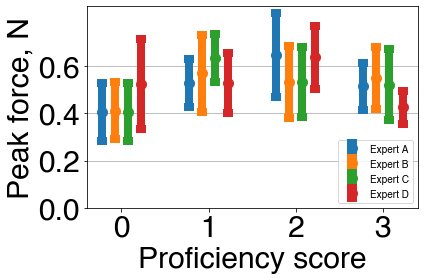

Expert A
Welchs ANOVA test
  Source  ddof1         ddof2            F  p-unc       np2
0  group      3  11318.088876  1860.348121    0.0  0.211693

Games-Howell post-hoc
   A  B  mean(A)  mean(B)   diff     se       T         df   pval  hedges
0  0  1    0.172    0.354 -0.182  0.003 -55.459   9087.195  0.001  -1.125
1  0  2    0.172    0.447 -0.275  0.004 -70.586   9689.914  0.001  -1.445
2  0  3    0.172    0.310 -0.138  0.003 -40.668   9252.191  0.001  -0.837
3  1  2    0.354    0.447 -0.094  0.004 -25.370  10045.139  0.001  -0.478
4  1  3    0.354    0.310  0.043  0.003  13.750  11009.562  0.001   0.260
5  2  3    0.447    0.310  0.137  0.004  36.052  10315.294  0.001   0.690


Expert B
Welchs ANOVA test
  Source  ddof1        ddof2           F  p-unc       np2
0  group      3  9678.283939  1363.72265    0.0  0.125174

Games-Howell post-hoc
   A  B  mean(A)  mean(B)   diff     se       T         df   pval  hedges
0  0  1    0.162    0.330 -0.168  0.004 -38.286   7341.822  0.001  -0.

In [18]:
plt.errorbar(np.array([0,1,2,3]),[np.mean(np.max(Expert_A_group_0,axis=1)),np.mean(np.max(Expert_A_group_1,axis=1)),
                                  np.mean(np.max(Expert_A_group_2,axis=1)),np.mean(np.max(Expert_A_group_3,axis=1))],
             yerr=[np.std(np.max(Expert_A_group_0,axis=1)),np.std(np.max(Expert_A_group_1,axis=1)),
                   np.std(np.max(Expert_A_group_2,axis=1)),np.std(np.max(Expert_A_group_3,axis=1))],fmt='o',
             capsize=5,markersize=10,capthick=8,label='Expert A',lw=8)
plt.errorbar([0.15,1.15,2.15,3.15],[np.mean(np.max(Expert_B_group_0,axis=1)),np.mean(np.max(Expert_B_group_1,axis=1)),
                                  np.mean(np.max(Expert_B_group_2,axis=1)),np.mean(np.max(Expert_B_group_3,axis=1))],
             yerr=[np.std(np.max(Expert_B_group_0,axis=1)),np.std(np.max(Expert_B_group_1,axis=1)),
                   np.std(np.max(Expert_B_group_2,axis=1)),np.std(np.max(Expert_B_group_3,axis=1))],fmt='o',
             capsize=5,markersize=10,capthick=8,label='Expert B',lw=8)
plt.errorbar([0.3,1.3,2.3,3.3],[np.mean(np.max(Expert_C_group_0,axis=1)),np.mean(np.max(Expert_C_group_1,axis=1)),
                                  np.mean(np.max(Expert_C_group_2,axis=1)),np.mean(np.max(Expert_C_group_3,axis=1))],
             yerr=[np.std(np.max(Expert_C_group_0,axis=1)),np.std(np.max(Expert_C_group_1,axis=1)),
                   np.std(np.max(Expert_C_group_2,axis=1)),np.std(np.max(Expert_C_group_3,axis=1))],fmt='o',
             capsize=5,markersize=10,capthick=8,label='Expert C',lw=8)
plt.errorbar([0.45,1.45,2.45,3.45],[np.mean(np.max(Expert_D_group_0,axis=1)),np.mean(np.max(Expert_D_group_1,axis=1)),
                                  np.mean(np.max(Expert_D_group_2,axis=1)),np.mean(np.max(Expert_D_group_3,axis=1))],
             yerr=[np.std(np.max(Expert_D_group_0,axis=1)),np.std(np.max(Expert_D_group_1,axis=1)),
                   np.std(np.max(Expert_D_group_2,axis=1)),np.std(np.max(Expert_D_group_3,axis=1))],fmt='o',
             capsize=5,markersize=10,capthick=8,label='Expert D',lw=8)

plt.xticks([0.225,1.225,2.225,3.225],labels=['0','1','2','3'],fontsize=30)
plt.yticks([0.0,0.2,0.4,0.6],fontsize=30)
plt.xlabel('Proficiency score',fontsize=30)
plt.ylabel('Peak force, N',fontsize=30)
plt.grid(axis='y')
plt.tight_layout()
plt.legend()
plt.show()

print('Expert A')
gameshowell([Expert_A_group_0.reshape(-1),Expert_A_group_1.reshape(-1),Expert_A_group_2.reshape(-1),Expert_A_group_3.reshape(-1)])

print('Expert B')
gameshowell([Expert_B_group_0.reshape(-1),Expert_B_group_1.reshape(-1),Expert_B_group_2.reshape(-1),Expert_B_group_3.reshape(-1)])

print('Expert C')
gameshowell([Expert_C_group_0.reshape(-1),Expert_C_group_1.reshape(-1),Expert_C_group_2.reshape(-1),Expert_C_group_3.reshape(-1)])

print('Expert D')
gameshowell([Expert_D_group_0.reshape(-1),Expert_D_group_1.reshape(-1),Expert_D_group_2.reshape(-1),Expert_D_group_3.reshape(-1)])

### Expert score vs normalized force

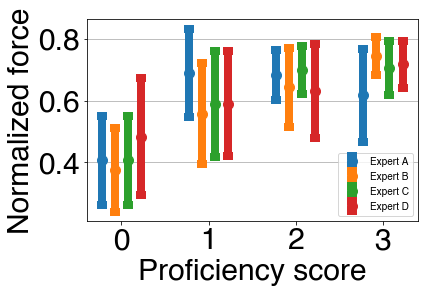

Expert A
Welchs ANOVA test
  Source  ddof1      ddof2          F         p-unc       np2
0  group      3  86.136033  35.242071  5.869294e-15  0.395236

Games-Howell post-hoc
   A  B  mean(A)  mean(B)   diff     se      T      df   pval  hedges
0  0  1    0.406    0.690 -0.284  0.033 -8.707  72.866  0.001  -1.917
1  0  2    0.406    0.684 -0.278  0.028 -9.989  50.231  0.001  -2.219
2  0  3    0.406    0.616 -0.210  0.034 -6.147  74.499  0.001  -1.379
3  1  2    0.690    0.684  0.006  0.024  0.261  75.352  0.900   0.053
4  1  3    0.690    0.616  0.074  0.031  2.352  88.021  0.094   0.487
5  2  3    0.684    0.616  0.068  0.026  2.560  65.248  0.060   0.535


Expert B
Welchs ANOVA test
  Source  ddof1      ddof2          F         p-unc       np2
0  group      3  69.206777  63.188229  8.741811e-20  0.455339

Games-Howell post-hoc
   A  B  mean(A)  mean(B)   diff     se       T      df   pval  hedges
0  0  1    0.375    0.557 -0.182  0.038  -4.836  51.676  0.001  -1.217
1  0  2    0.375  

In [19]:
plt.errorbar([0,1,2,3],
             [np.mean(np.mean(Expert_A_group_0,axis=1)/np.max(Expert_A_group_0,axis=1)),
              np.mean(np.mean(Expert_A_group_1,axis=1)/np.max(Expert_A_group_1,axis=1)),
              np.mean(np.mean(Expert_A_group_2,axis=1)/np.max(Expert_A_group_2,axis=1)),
              np.mean(np.mean(Expert_A_group_3,axis=1)/np.max(Expert_A_group_3,axis=1))],
             yerr=[np.std(np.mean(Expert_A_group_0,axis=1)/np.max(Expert_A_group_0,axis=1)),
              np.std(np.mean(Expert_A_group_1,axis=1)/np.max(Expert_A_group_1,axis=1)),
              np.std(np.mean(Expert_A_group_2,axis=1)/np.max(Expert_A_group_2,axis=1)),
              np.std(np.mean(Expert_A_group_3,axis=1)/np.max(Expert_A_group_3,axis=1))],
             fmt='o',markersize=10,capsize=5,capthick=8,label='Expert A',lw=8)

plt.errorbar([0.15,1.15,2.15,3.15],
             [np.mean(np.mean(Expert_B_group_0,axis=1)/np.max(Expert_B_group_0,axis=1)),
              np.mean(np.mean(Expert_B_group_1,axis=1)/np.max(Expert_B_group_1,axis=1)),
              np.mean(np.mean(Expert_B_group_2,axis=1)/np.max(Expert_B_group_2,axis=1)),
              np.mean(np.mean(Expert_B_group_3,axis=1)/np.max(Expert_B_group_3,axis=1))],
             yerr=[np.std(np.mean(Expert_B_group_0,axis=1)/np.max(Expert_B_group_0,axis=1)),
              np.std(np.mean(Expert_B_group_1,axis=1)/np.max(Expert_B_group_1,axis=1)),
              np.std(np.mean(Expert_B_group_2,axis=1)/np.max(Expert_B_group_2,axis=1)),
              np.std(np.mean(Expert_B_group_3,axis=1)/np.max(Expert_B_group_3,axis=1))],
             fmt='o',markersize=10,capsize=5,capthick=8,label='Expert B',lw=8)

plt.errorbar([0.3,1.3,2.3,3.3],
             [np.mean(np.mean(Expert_C_group_0,axis=1)/np.max(Expert_C_group_0,axis=1)),
              np.mean(np.mean(Expert_C_group_1,axis=1)/np.max(Expert_C_group_1,axis=1)),
              np.mean(np.mean(Expert_C_group_2,axis=1)/np.max(Expert_C_group_2,axis=1)),
              np.mean(np.mean(Expert_C_group_3,axis=1)/np.max(Expert_C_group_3,axis=1))],
             yerr=[np.std(np.mean(Expert_C_group_0,axis=1)/np.max(Expert_C_group_0,axis=1)),
              np.std(np.mean(Expert_C_group_1,axis=1)/np.max(Expert_C_group_1,axis=1)),
              np.std(np.mean(Expert_C_group_2,axis=1)/np.max(Expert_C_group_2,axis=1)),
              np.std(np.mean(Expert_C_group_3,axis=1)/np.max(Expert_C_group_3,axis=1))],
             fmt='o',markersize=10,capsize=5,capthick=8,label='Expert C',lw=8)

plt.errorbar([0.45,1.45,2.45,3.45],
             [np.mean(np.mean(Expert_D_group_0,axis=1)/np.max(Expert_D_group_0,axis=1)),
              np.mean(np.mean(Expert_D_group_1,axis=1)/np.max(Expert_D_group_1,axis=1)),
              np.mean(np.mean(Expert_D_group_2,axis=1)/np.max(Expert_D_group_2,axis=1)),
              np.mean(np.mean(Expert_D_group_3,axis=1)/np.max(Expert_D_group_3,axis=1))],
             yerr=[np.std(np.mean(Expert_D_group_0,axis=1)/np.max(Expert_D_group_0,axis=1)),
              np.std(np.mean(Expert_D_group_1,axis=1)/np.max(Expert_D_group_1,axis=1)),
              np.std(np.mean(Expert_D_group_2,axis=1)/np.max(Expert_D_group_2,axis=1)),
              np.std(np.mean(Expert_D_group_3,axis=1)/np.max(Expert_D_group_3,axis=1))],
             fmt='o',markersize=10,capsize=5,capthick=8,label='Expert D',lw=8)

plt.yticks([0.4,0.6,0.8],fontsize=30)
plt.xticks([0.225,1.225,2.225,3.225],labels=['0','1','2','3'],fontsize=30)
plt.xlabel('Proficiency score',fontsize=30)
plt.ylabel('Normalized force',fontsize=30)
plt.grid(axis='y')
plt.tight_layout()
plt.legend()
plt.show()

print('Expert A')
gameshowell([np.mean(Expert_A_group_0,axis=1)/np.max(Expert_A_group_0,axis=1),np.mean(Expert_A_group_1,axis=1)/np.max(Expert_A_group_1,axis=1),
             np.mean(Expert_A_group_2,axis=1)/np.max(Expert_A_group_2,axis=1),np.mean(Expert_A_group_3,axis=1)/np.max(Expert_A_group_3,axis=1)])

print('Expert B')
gameshowell([np.mean(Expert_B_group_0,axis=1)/np.max(Expert_B_group_0,axis=1),np.mean(Expert_B_group_1,axis=1)/np.max(Expert_B_group_1,axis=1),
             np.mean(Expert_B_group_2,axis=1)/np.max(Expert_B_group_2,axis=1),np.mean(Expert_B_group_3,axis=1)/np.max(Expert_B_group_3,axis=1)])

print('Expert C')
gameshowell([np.mean(Expert_C_group_0,axis=1)/np.max(Expert_C_group_0,axis=1),np.mean(Expert_C_group_1,axis=1)/np.max(Expert_C_group_1,axis=1),
             np.mean(Expert_C_group_2,axis=1)/np.max(Expert_C_group_2,axis=1),np.mean(Expert_C_group_3,axis=1)/np.max(Expert_C_group_3,axis=1)])

print('Expert D')
gameshowell([np.mean(Expert_D_group_0,axis=1)/np.max(Expert_D_group_0,axis=1),np.mean(Expert_D_group_1,axis=1)/np.max(Expert_D_group_1,axis=1),
             np.mean(Expert_D_group_2,axis=1)/np.max(Expert_D_group_2,axis=1),np.mean(Expert_D_group_3,axis=1)/np.max(Expert_D_group_3,axis=1)])

### Expert score vs force derivative metric

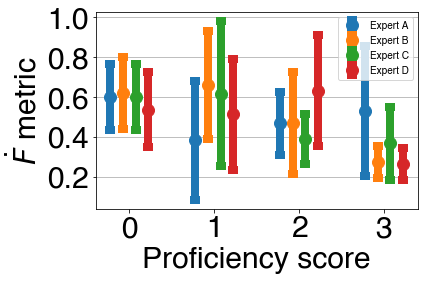

Expert A
Welchs ANOVA test
  Source  ddof1      ddof2         F     p-unc       np2
0  group      3  90.288404  7.289683  0.000197  0.089795

Games-Howell post-hoc
   A  B  mean(A)  mean(B)   diff     se      T      df   pval  hedges
0  0  1    0.600    0.384  0.216  0.052  4.174  76.039  0.001   0.919
1  0  2    0.600    0.468  0.132  0.036  3.623  71.294  0.003   0.805
2  0  3    0.600    0.539  0.062  0.057  1.079  66.136  0.681   0.242
3  1  2    0.384    0.468 -0.084  0.049 -1.705  71.553  0.329  -0.349
4  1  3    0.384    0.539 -0.154  0.066 -2.332  87.158  0.099  -0.483
5  2  3    0.468    0.539 -0.070  0.055 -1.276  60.940  0.572  -0.267


Expert B
Welchs ANOVA test
  Source  ddof1      ddof2          F         p-unc       np2
0  group      3  67.341134  53.949772  6.886425e-18  0.330122

Games-Howell post-hoc
   A  B  mean(A)  mean(B)   diff     se      T      df   pval  hedges
0  0  1    0.620    0.662 -0.042  0.055 -0.750  60.984  0.864  -0.189
1  0  2    0.620    0.471  0.1

In [20]:
plt.errorbar([0,1,2,3],
             [np.mean(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_A_group_0,axis=1)**2,axis=1))[:,-1]),
              np.mean(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_A_group_1,axis=1)**2,axis=1))[:,-1]),
              np.mean(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_A_group_2,axis=1)**2,axis=1))[:,-1]),
              np.mean(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_A_group_3,axis=1)**2,axis=1))[:,-1])],
             yerr=[np.std(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_A_group_0,axis=1)**2,axis=1))[:,-1]),
                   np.std(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_A_group_1,axis=1)**2,axis=1))[:,-1]),
                   np.std(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_A_group_2,axis=1)**2,axis=1))[:,-1]),
                   np.std(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_A_group_3,axis=1)**2,axis=1))[:,-1])],
             fmt='o',markersize=12,capsize=5,capthick=8,label='Expert A',lw=8)

plt.errorbar([0.15,1.15,2.15,3.15],
             [np.mean(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_B_group_0,axis=1)**2,axis=1))[:,-1]),
              np.mean(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_B_group_1,axis=1)**2,axis=1))[:,-1]),
              np.mean(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_B_group_2,axis=1)**2,axis=1))[:,-1]),
              np.mean(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_B_group_3,axis=1)**2,axis=1))[:,-1])],
             yerr=[np.std(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_B_group_0,axis=1)**2,axis=1))[:,-1]),
                   np.std(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_B_group_1,axis=1)**2,axis=1))[:,-1]),
                   np.std(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_B_group_2,axis=1)**2,axis=1))[:,-1]),
                   np.std(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_B_group_3,axis=1)**2,axis=1))[:,-1])],
             fmt='o',markersize=12,capsize=5,capthick=8,label='Expert B',lw=8)


plt.errorbar([0.3,1.3,2.3,3.3],
             [np.mean(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_C_group_0,axis=1)**2,axis=1))[:,-1]),
              np.mean(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_C_group_1,axis=1)**2,axis=1))[:,-1]),
              np.mean(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_C_group_2,axis=1)**2,axis=1))[:,-1]),
              np.mean(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_C_group_3,axis=1)**2,axis=1))[:,-1])],
             yerr=[np.std(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_C_group_0,axis=1)**2,axis=1))[:,-1]),
                   np.std(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_C_group_1,axis=1)**2,axis=1))[:,-1]),
                   np.std(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_C_group_2,axis=1)**2,axis=1))[:,-1]),
                   np.std(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_C_group_3,axis=1)**2,axis=1))[:,-1])],
             fmt='o',markersize=12,capsize=5,capthick=8,label='Expert C',lw=8)


plt.errorbar([0.45,1.45,2.45,3.45],
             [np.mean(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_D_group_0,axis=1)**2,axis=1))[:,-1]),
              np.mean(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_D_group_1,axis=1)**2,axis=1))[:,-1]),
              np.mean(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_D_group_2,axis=1)**2,axis=1))[:,-1]),
              np.mean(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_D_group_3,axis=1)**2,axis=1))[:,-1])],
             yerr=[np.std(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_D_group_0,axis=1)**2,axis=1))[:,-1]),
                   np.std(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_D_group_1,axis=1)**2,axis=1))[:,-1]),
                   np.std(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_D_group_2,axis=1)**2,axis=1))[:,-1]),
                   np.std(np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_D_group_3,axis=1)**2,axis=1))[:,-1])],
             fmt='o',markersize=12,capsize=5,capthick=8,label='Expert D',lw=8)

plt.yticks(fontsize=30)
plt.xticks([0.225,1.225,2.225,3.225],labels=['0','1','2','3'],fontsize=30)
plt.xlabel('Proficiency score',fontsize=30)
plt.ylabel('$\dot{F}$ metric',fontsize=30)
plt.grid(axis='y')
plt.tight_layout()
plt.legend()
plt.show()

print('Expert A')
gameshowell([np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_A_group_0,axis=1)**2,axis=1))[:,-1],
             np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_A_group_1,axis=1)**2,axis=1))[:,-1],
             np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_A_group_2,axis=1)**2,axis=1))[:,-1],
             np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_A_group_3,axis=1)**2,axis=1))[:,-1]])

print('Expert B')
gameshowell([np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_B_group_0,axis=1)**2,axis=1))[:,-1],
             np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_B_group_1,axis=1)**2,axis=1))[:,-1],
             np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_B_group_2,axis=1)**2,axis=1))[:,-1],
             np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_B_group_3,axis=1)**2,axis=1))[:,-1]])

print('Expert C')
gameshowell([np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_C_group_0,axis=1)**2,axis=1))[:,-1],
             np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_C_group_1,axis=1)**2,axis=1))[:,-1],
             np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_C_group_2,axis=1)**2,axis=1))[:,-1],
             np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_C_group_3,axis=1)**2,axis=1))[:,-1]])

print('Expert D')
gameshowell([np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_D_group_0,axis=1)**2,axis=1))[:,-1],
             np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_D_group_1,axis=1)**2,axis=1))[:,-1],
             np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_D_group_2,axis=1)**2,axis=1))[:,-1],
             np.sqrt((0.033*T)*np.cumsum(np.diff(Expert_D_group_3,axis=1)**2,axis=1))[:,-1]])

### Force integral vs expert score

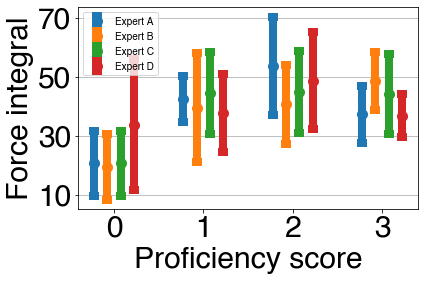

Expert A
Welchs ANOVA test
  Source  ddof1      ddof2          F         p-unc       np2
0  group      3  87.626282  45.503739  7.977036e-18  0.480522

Games-Howell post-hoc
   A  B    mean(A)    mean(B)       diff     se       T      df   pval  hedges
0  0  1  20.658001  42.451000 -21.794001  2.205  -9.886  57.002  0.001  -2.177
1  0  2  20.658001  53.678001 -33.020000  3.127 -10.561  77.761  0.001  -2.346
2  0  3  20.658001  37.512001 -16.854000  2.405  -7.009  68.018  0.001  -1.572
3  1  2  42.451000  53.678001 -11.227000  2.728  -4.115  62.775  0.001  -0.842
4  1  3  42.451000  37.512001   4.939000  1.857   2.660  82.018  0.046   0.550
5  2  3  53.678001  37.512001  16.166000  2.892   5.590  72.915  0.001   1.169


Expert B
Welchs ANOVA test
  Source  ddof1      ddof2          F         p-unc       np2
0  group      3  76.921107  35.422295  1.741509e-14  0.280041

Games-Howell post-hoc
   A  B    mean(A)    mean(B)       diff     se       T      df   pval  hedges
0  0  1  19.417999

In [21]:
plt.errorbar([0,1,2,3],
             [np.mean(np.cumsum(Expert_A_group_0, axis=1)[:,-1]),np.mean(np.cumsum(Expert_A_group_1, axis=1)[:,-1]),
              np.mean(np.cumsum(Expert_A_group_2, axis=1)[:,-1]),np.mean(np.cumsum(Expert_A_group_3, axis=1)[:,-1])],
             yerr=[np.std(np.cumsum(Expert_A_group_0, axis=1)[:,-1]),np.std(np.cumsum(Expert_A_group_1, axis=1)[:,-1]),
                   np.std(np.cumsum(Expert_A_group_2, axis=1)[:,-1]),np.std(np.cumsum(Expert_A_group_3, axis=1)[:,-1])],
             fmt='o',markersize=10,capsize=5,capthick=8,label='Expert A',lw=8)
plt.errorbar([0.15,1.15,2.15,3.15],
             [np.mean(np.cumsum(Expert_B_group_0, axis=1)[:,-1]),np.mean(np.cumsum(Expert_B_group_1, axis=1)[:,-1]),
              np.mean(np.cumsum(Expert_B_group_2, axis=1)[:,-1]),np.mean(np.cumsum(Expert_B_group_3, axis=1)[:,-1])],
             yerr=[np.std(np.cumsum(Expert_B_group_0, axis=1)[:,-1]),np.std(np.cumsum(Expert_B_group_1, axis=1)[:,-1]),
                   np.std(np.cumsum(Expert_B_group_2, axis=1)[:,-1]),np.std(np.cumsum(Expert_B_group_3, axis=1)[:,-1])],
             fmt='o',markersize=10,capsize=5,capthick=8,label='Expert B',lw=8)

plt.errorbar([0.3,1.3,2.3,3.3],
             [np.mean(np.cumsum(Expert_C_group_0, axis=1)[:,-1]),np.mean(np.cumsum(Expert_C_group_1, axis=1)[:,-1]),
              np.mean(np.cumsum(Expert_C_group_2, axis=1)[:,-1]),np.mean(np.cumsum(Expert_C_group_3, axis=1)[:,-1])],
             yerr=[np.std(np.cumsum(Expert_C_group_0, axis=1)[:,-1]),np.std(np.cumsum(Expert_C_group_1, axis=1)[:,-1]),
                   np.std(np.cumsum(Expert_C_group_2, axis=1)[:,-1]),np.std(np.cumsum(Expert_C_group_3, axis=1)[:,-1])],
             fmt='o',markersize=10,capsize=5,capthick=8,label='Expert C',lw=8)

plt.errorbar([0.45,1.45,2.45,3.45],
             [np.mean(np.cumsum(Expert_D_group_0, axis=1)[:,-1]),np.mean(np.cumsum(Expert_D_group_1, axis=1)[:,-1]),
              np.mean(np.cumsum(Expert_D_group_2, axis=1)[:,-1]),np.mean(np.cumsum(Expert_D_group_3, axis=1)[:,-1])],
             yerr=[np.std(np.cumsum(Expert_D_group_0, axis=1)[:,-1]),np.std(np.cumsum(Expert_D_group_1, axis=1)[:,-1]),
                   np.std(np.cumsum(Expert_D_group_2, axis=1)[:,-1]),np.std(np.cumsum(Expert_D_group_3, axis=1)[:,-1])],
             fmt='o',markersize=10,capsize=5,capthick=8,label='Expert D',lw=8)

plt.yticks([10,30,50,70],fontsize=30)
plt.xticks([0.225,1.225,2.225,3.225],labels=['0','1','2','3'],fontsize=30)
plt.xlabel('Proficiency score',fontsize=30)
plt.ylabel('Force integral',fontsize=30)
plt.grid(axis='y')
plt.tight_layout()
plt.legend()
plt.show()

print('Expert A')
gameshowell([np.cumsum(Expert_A_group_0, axis=1)[:,-1],np.cumsum(Expert_A_group_1, axis=1)[:,-1],
             np.cumsum(Expert_A_group_2, axis=1)[:,-1],np.cumsum(Expert_A_group_3, axis=1)[:,-1]])

print('Expert B')
gameshowell([np.cumsum(Expert_B_group_0, axis=1)[:,-1],np.cumsum(Expert_B_group_1, axis=1)[:,-1],
             np.cumsum(Expert_B_group_2, axis=1)[:,-1],np.cumsum(Expert_B_group_3, axis=1)[:,-1]])

print('Expert C')
gameshowell([np.cumsum(Expert_C_group_0, axis=1)[:,-1],np.cumsum(Expert_C_group_1, axis=1)[:,-1],
             np.cumsum(Expert_C_group_2, axis=1)[:,-1],np.cumsum(Expert_C_group_3, axis=1)[:,-1]])

print('Expert D')
gameshowell([np.cumsum(Expert_D_group_0, axis=1)[:,-1],np.cumsum(Expert_D_group_1, axis=1)[:,-1],
             np.cumsum(Expert_D_group_2, axis=1)[:,-1],np.cumsum(Expert_D_group_3, axis=1)[:,-1]])

# Elliptical excision force model

In [22]:
from hmmlearn import hmm

# Fit Gaussian HHM model to the virtual velocity profiles
K = 2 # Number of regimes
Models = []
for subject in range(Num_models):
    model_ = hmm.GaussianHMM(n_components=K, covariance_type="full", n_iter=100, min_covar=0.000001)
    model_.fit(virtual_velocity[subject].reshape(-1,1), 
               (T-1)*np.ones(virtual_velocity[subject].shape[0],dtype='int32'))  
    Models.append(model_)

In [23]:
# Model update step
def step(z,regime,dt):
    
    alpha = -2.0
    beta = 1.0
    gamma = -2.0
    delta = 1.0
    
    A = np.array([[alpha,beta,0.0],[0.0,0.0,regime],[0.0,0.0,0.0]])
    C = np.array([gamma,delta,0.0])
    
    z_new = z + np.matmul(A,z)*dt
    y = np.matmul(C,z)
    
    return z_new, y

# Generate synthetic force profiles
virtual_velocity_gen = np.zeros([Num_models,Num_cuts,T-1])
virtual_displacement_gen  = np.zeros([Num_models,Num_cuts,T-1])
force_gen  = np.zeros([Num_models,Num_cuts,T-1])

for subject in range(Num_models):
    for cut in range(Num_cuts):
        
        # Sample virtual velocity profiles from trained model
        virtual_velocity_sample, _ = Models[subject].sample(T-1)
        virtual_velocity_sample = virtual_velocity_sample.reshape(-1)
        
        # Integrate the Maxwell model
        Z = [np.array([0,0,1])] # hidden state
        Y = [] # observable (force)
        for n in range(virtual_velocity_sample.shape[0]):
            z, y = step(Z[-1],virtual_velocity_sample[n],dt)
            Z.append(z)
            Y.append(y)
        
        force_gen[subject,cut,:] = np.array(Y)
        virtual_displacement_gen[subject,cut,:] = np.array(Z)[:-1,1]
        virtual_velocity_gen[subject,cut,:] = virtual_velocity_sample

# Model parameters

In [24]:
model_parameters = np.zeros([Num_models,K+K+K**2])
model_parameters_standard = np.zeros([Num_models,K+K+K**2])

for m in range(Num_models):
    
    model_ = Models[m]
    indx = np.argsort(Models[m].means_.reshape(-1)) # index of sorted regimes from lower to upper
    
    means_ = np.zeros(K)
    covars_ = np.zeros(K)
    Q = np.zeros([K,K])
    
    for k in range(K):
        means_[k] = model_.means_[indx[k]][0]
        covars_[k] = model_.covars_[indx[k]][0]
        Q[k,:] = model_.transmat_[indx[k],indx]
        
    model_parameters[m,:K] = means_
    model_parameters[m,K:2*K] = covars_
    model_parameters[m,2*K:] = Q.reshape(-1)
    

# Standardize parameters
import sklearn.preprocessing
scaler = preprocessing.StandardScaler().fit(model_parameters)
model_parameters_standard = scaler.transform(model_parameters)

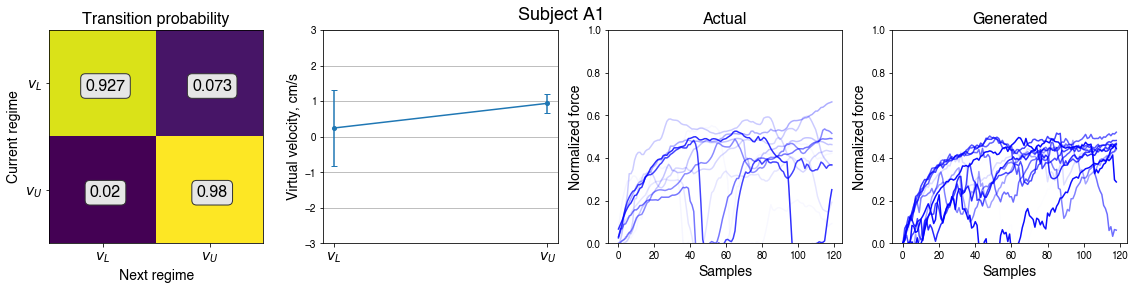

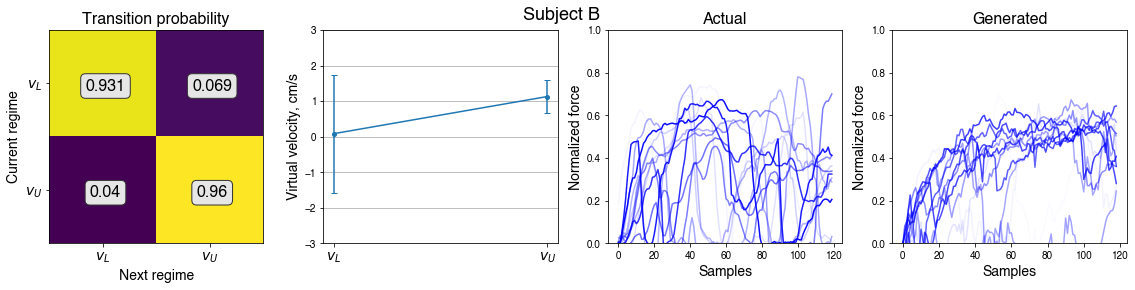

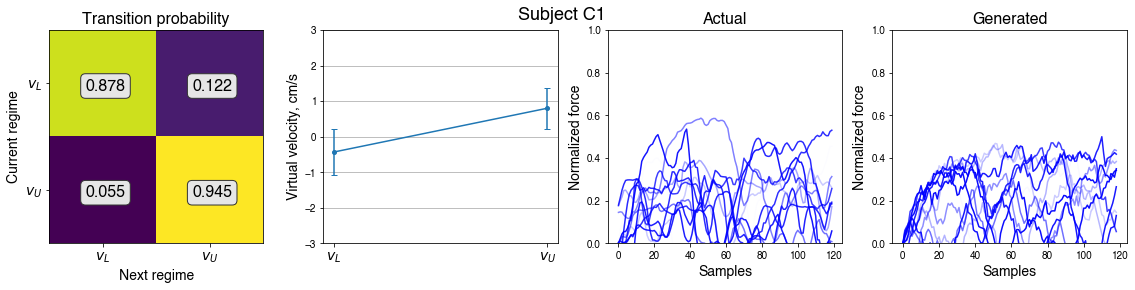

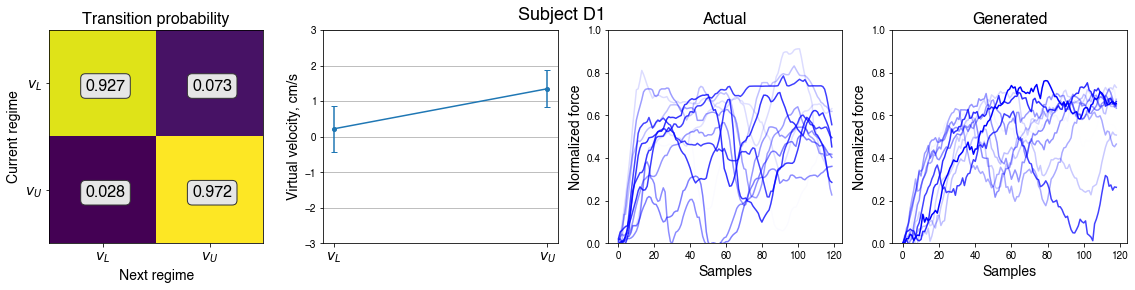

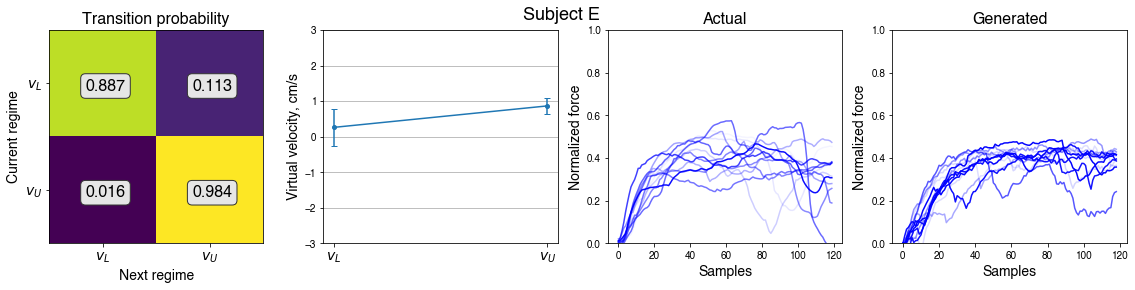

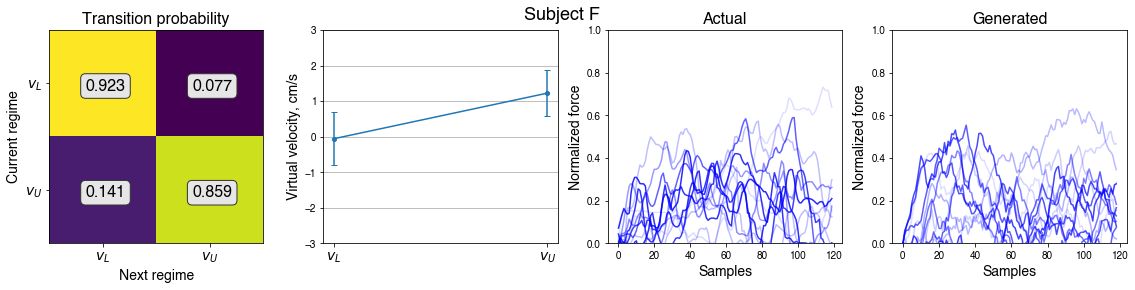

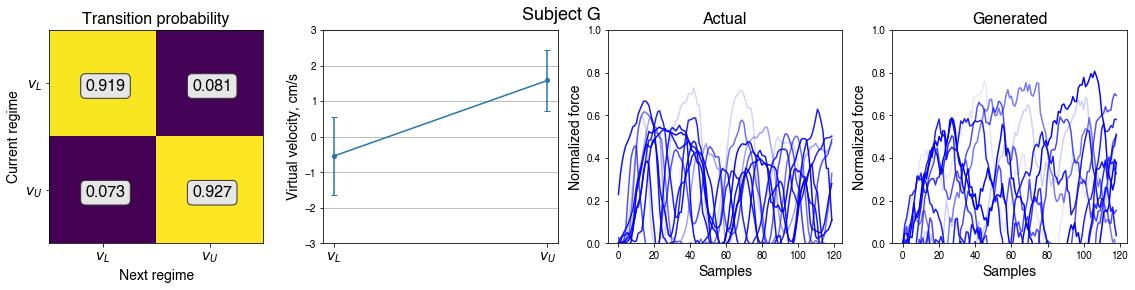

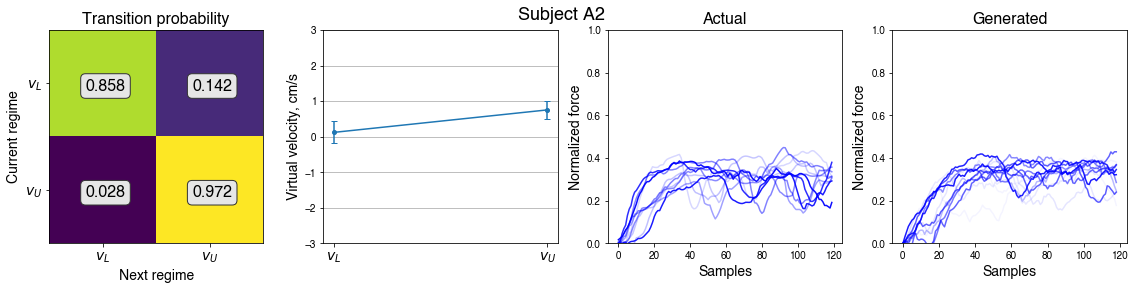

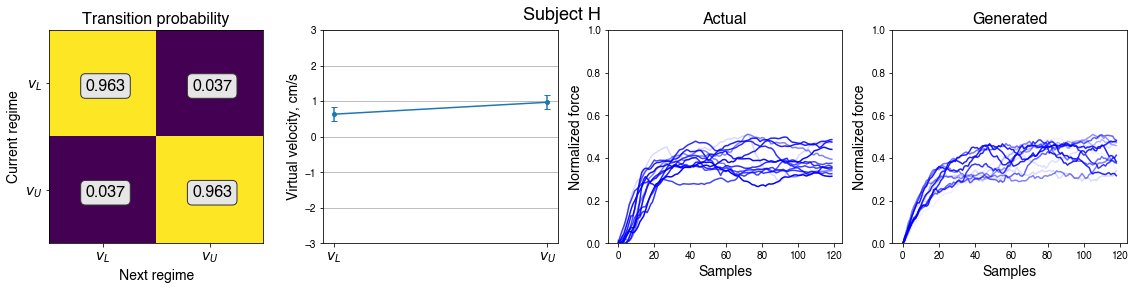

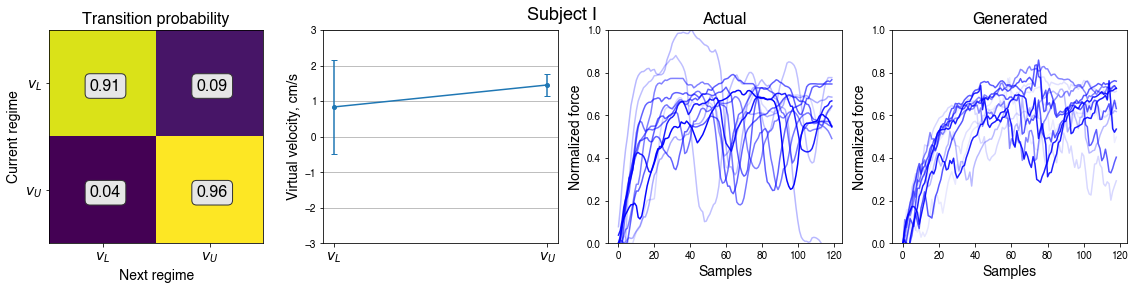

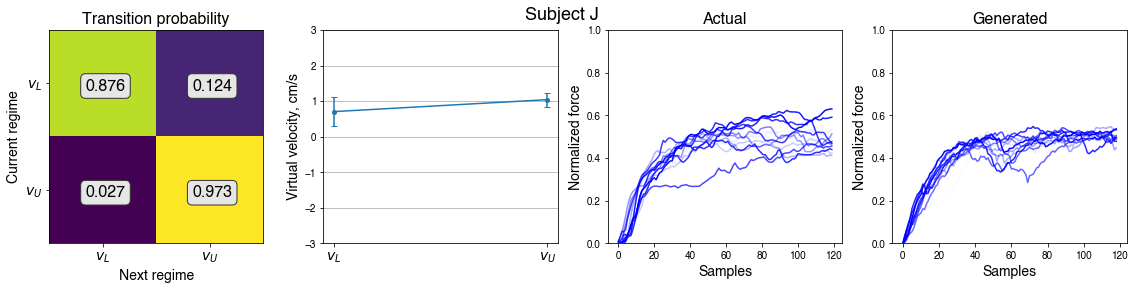

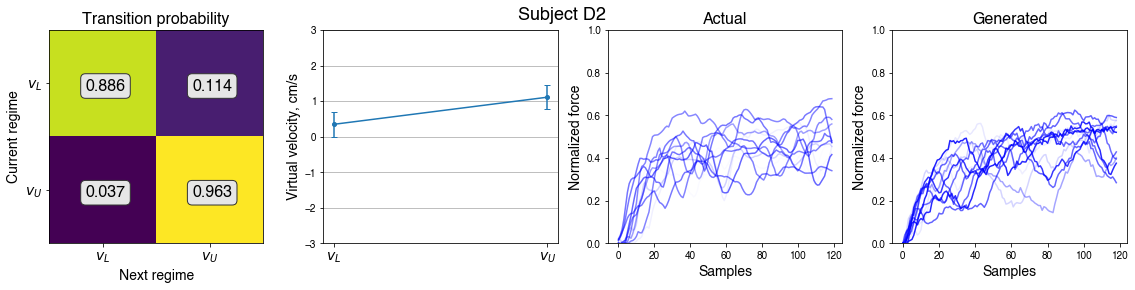

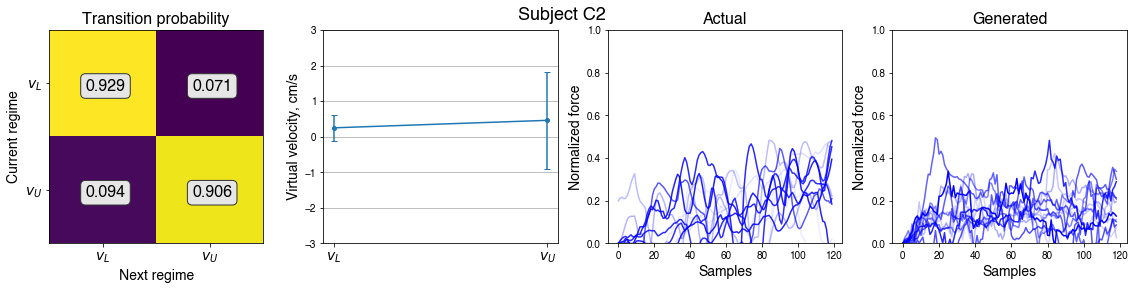

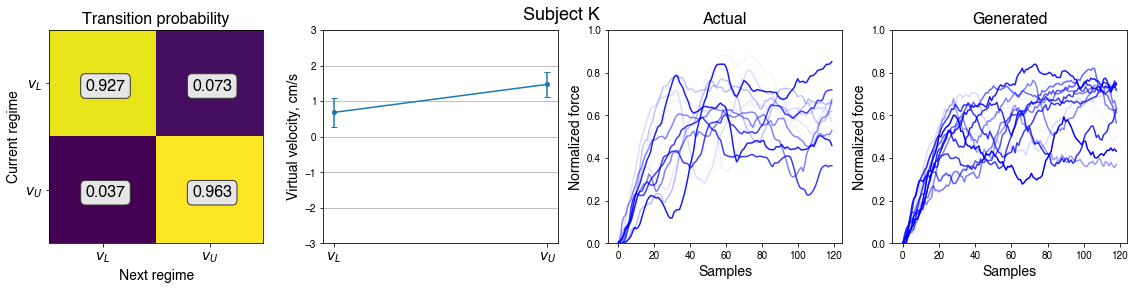

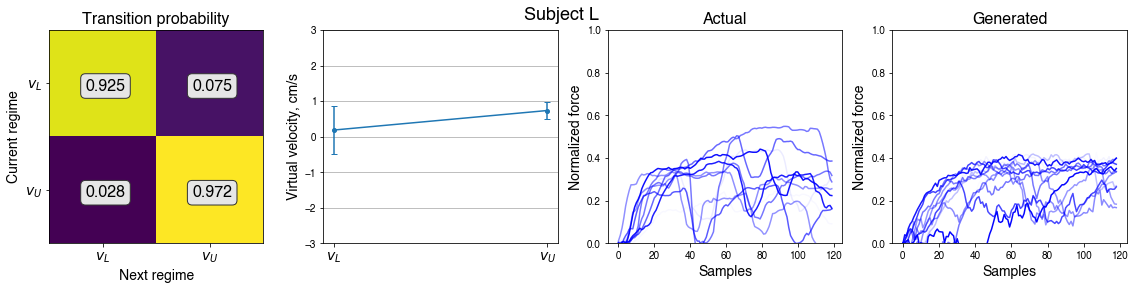

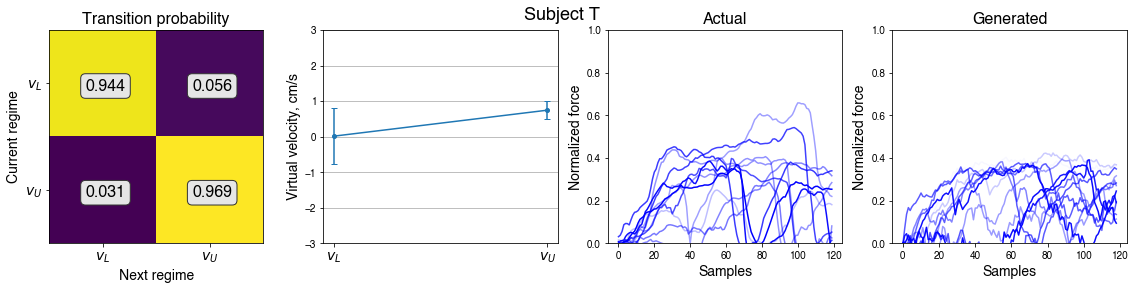

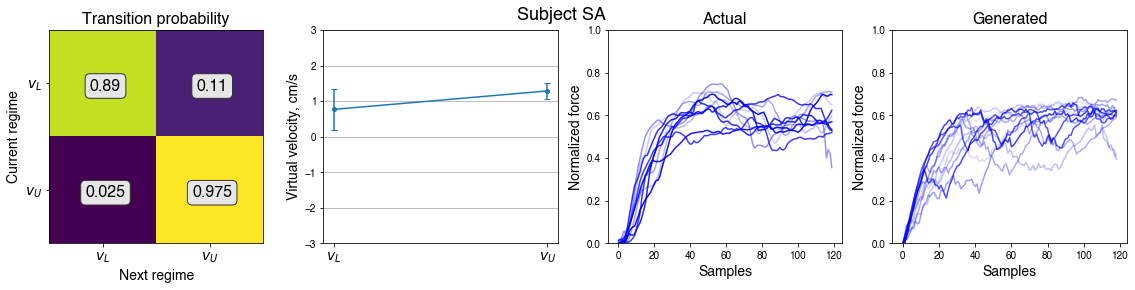

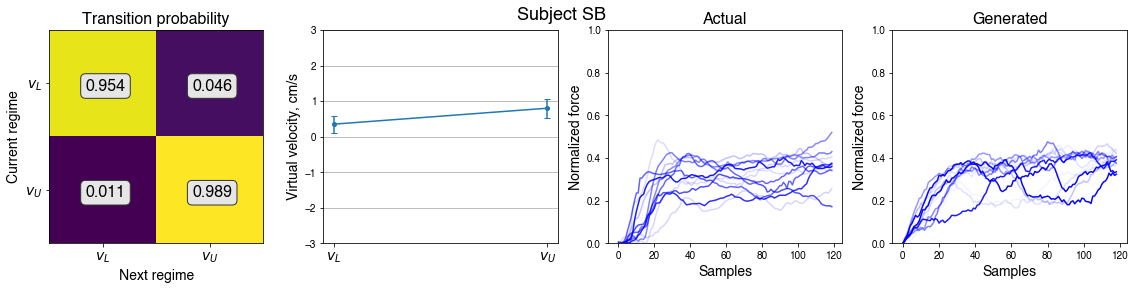

In [25]:
for subj_ in subject_names:
    
    indx = np.where(np.array(subject_names) == subj_)[0][0]
        
    plt.figure(figsize=(16,4))
    
    plt.subplot(1,4,1)
    plt.imshow(model_parameters[indx,K*2:].reshape(K,K),cmap='viridis')
    plt.xticks(np.arange(K),['$v_{\it{L}}$','$v_{\it{U}}$'],fontsize=14)
    plt.yticks(np.arange(K),['$v_{\it{L}}$','$v_{\it{U}}$'],fontsize=14)
    plt.xlabel('Next regime', fontsize=14)
    plt.ylabel('Current regime', fontsize=14)
    plt.title('Transition probability', fontsize=16)

    inc = 0
    for j in range(2):
        for q in range(2):
            plt.text(0.025+q, 0.025+j, str(model_parameters[indx,K*2+inc].round(3)), size=16,
             ha="center", va="center",
             bbox=dict(boxstyle="round",ec=(0.2, 0.2, 0.2),fc=(0.9, 0.9, 0.9),))
            inc += 1
    
    plt.subplot(1,4,2)
    plt.errorbar(np.arange(K),model_parameters[indx,:K],
                 yerr=np.sqrt(model_parameters[indx,K:K*2]),
                fmt='-o',markersize=4,capsize=3,capthick=1)
    plt.grid(axis='y')
    plt.ylim([-3,3])
    plt.xticks(np.arange(K),['$v_{\it{L}}$','$v_{\it{U}}$'],fontsize=14)
#     plt.xlabel('Regime', fontsize=14)
    plt.ylabel('Virtual velocity, cm/s', fontsize=14)
    
    plt.subplot(1,4,3)
    for cut in range(force[indx].shape[0]):
        plt.plot(force[indx][cut,:T],c='b',alpha=np.random.rand())
    plt.ylim([0,1])
    plt.ylabel('Normalized force',fontsize=14)
    plt.xlabel('Samples',fontsize=14)
    plt.title('Actual',fontsize=16)
    
    plt.subplot(1,4,4)
    for cut in range(force_gen[indx].shape[0]):
        plt.plot(force_gen[indx][cut,:T],c='b',alpha=np.random.rand())
    plt.ylim([0,1])
    plt.ylabel('Normalized force',fontsize=14)
    plt.xlabel('Samples',fontsize=14)
    plt.title('Generated',fontsize=16)
    
    plt.tight_layout()
    plt.suptitle('Subject '+str(subject_names[indx]),fontsize=18)

### Spearman's rank correlation between model parameters and expert evaluation scores

In [26]:
from scipy import stats

critical_value = 0.446
Expert_eval = [Expert_A_score,Expert_B_score,Expert_C_score,Expert_D_score]

Experts = ['Expert A','Expert B','Expert C','Expert D']
Params_ = ['v_L','v_U','Sigma_L','Sigma_U','q_11','q21','q12','q22']

for expert_ in range(len(Expert_eval)):
    corr_ = 0
    print(Experts[expert_])
    for param_ in range(model_parameters.shape[1]):
        if (np.abs(stats.spearmanr(Expert_eval[expert_],model_parameters[:-3,param_])[0]) > critical_value):
            corr_ += 1
            print(Params_[param_]+', r* =', stats.spearmanr(Expert_eval[expert_],model_parameters[:-3,param_])[0])
        else:
            print(Params_[param_]+', r =', stats.spearmanr(Expert_eval[expert_],model_parameters[:-3,param_])[0])
    print('Number of significant correlations: ',corr_)
    print()

Expert A
v_L, r = 0.055275715023636304
v_U, r = 0.26532343211345427
Sigma_L, r = 0.057118238857757506
Sigma_U, r = -0.20636266942157555
q_11, r = -0.20636266942157555
q21, r = 0.20636266942157555
q12, r = -0.3961426243360602
q22, r = 0.3961426243360602
Number of significant correlations:  0

Expert B
v_L, r* = 0.4952603599242562
v_U, r = 0.044517785161730904
Sigma_L, r = -0.4396131284720926
Sigma_U, r* = -0.7345434551685599
q_11, r = -0.005564723145216363
q21, r = 0.005564723145216363
q12, r* = -0.6622020542807472
q22, r* = 0.6622020542807472
Number of significant correlations:  4

Expert C
v_L, r = 0.4217019235375515
v_U, r = -0.09062892216377204
Sigma_L, r = -0.0055487095202309406
Sigma_U, r* = -0.6917391201887906
q_11, r = 0.035141826961462626
q21, r = -0.035141826961462626
q12, r* = -0.658446863067405
q22, r* = 0.658446863067405
Number of significant correlations:  3

Expert D
v_L, r = 0.046063095853030256
v_U, r = -0.21741781242630281
Sigma_L, r = -0.21189024092393915
Sigma_U, r* 

### Plots of model parameters

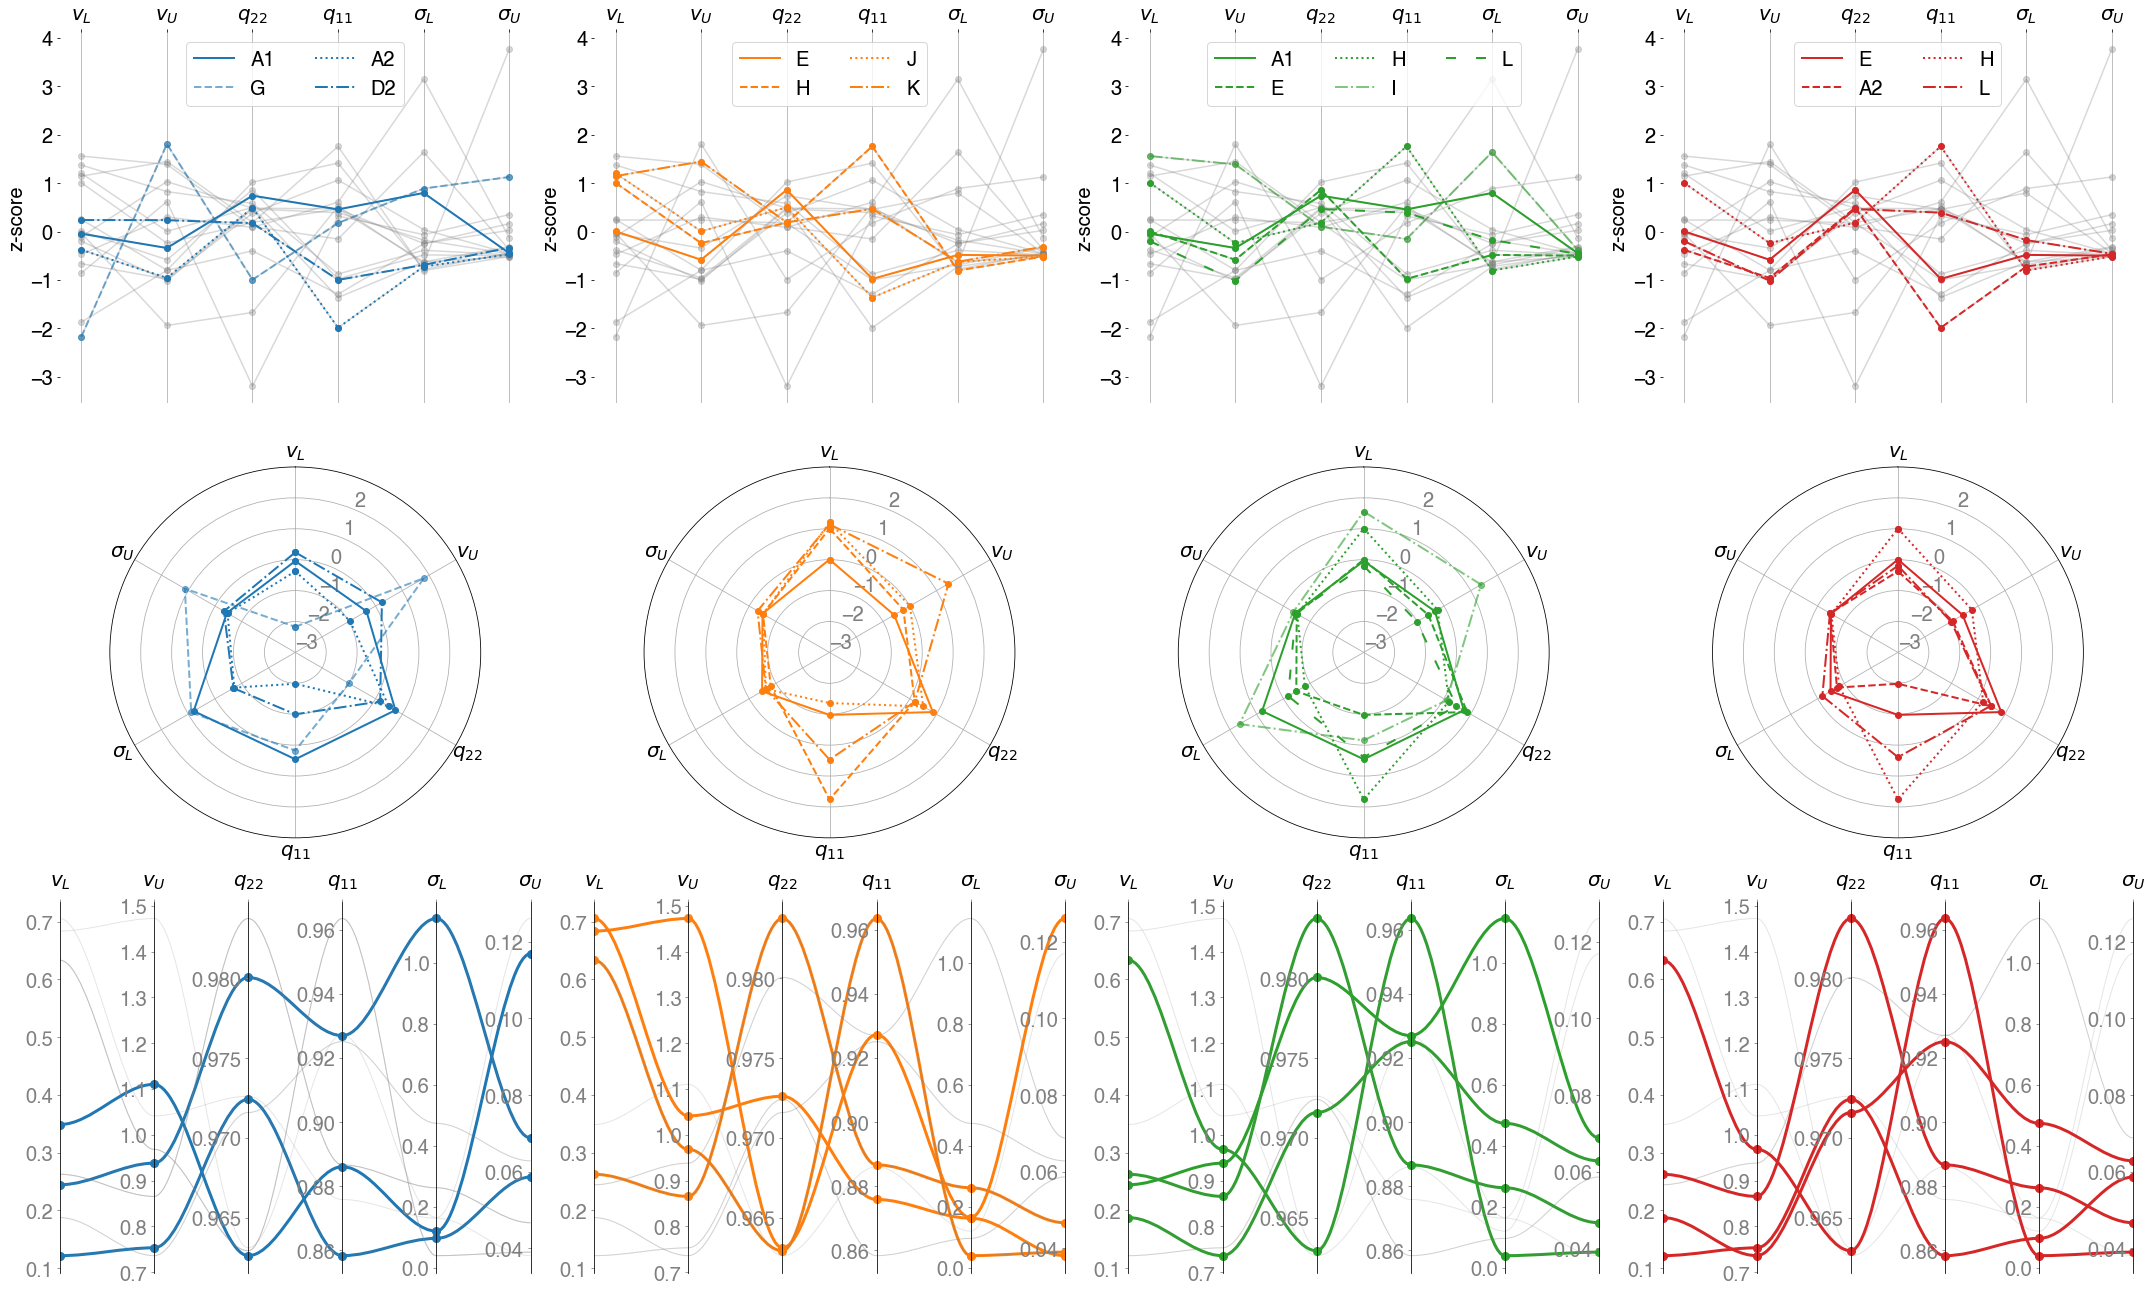

In [27]:
ls_ = ['-','--',':','-.',(0, (5, 10))]
order_ = np.array([0,1,7,4,2,3])
axes_ = ['$v_{\it{L}}$','$v_{\it{U}}$',
         '$\sigma_{\it{L}}$','$\sigma_{\it{U}}$','$q_{11}$','P(c|s)','P(s|c)','$q_{22}$']

# Experts' top scorers
Expert_A_top = np.array(subject_names)[np.where(Expert_A_score >= 3)[0]]
Expert_B_top = np.array(subject_names)[np.where(Expert_B_score >= 3)[0]]
Expert_C_top = np.array(subject_names)[np.where(Expert_C_score >= 3)[0]]
Expert_D_top = np.array(subject_names)[np.where(Expert_D_score >= 3)[0]]
Expert_A_top_nooutlier = Expert_A_top[np.where(Expert_A_top != 'G')[0]]
Expert_C_top_noontlier = Expert_C_top[np.where(Expert_C_top != 'I')[0]]

fig = plt.figure(figsize=(30,18))

# Expert A, parallel plot (standardized)
ax = plt.subplot(3,4,1)
for i in range(18):
    plt.plot(model_parameters_standard[i,order_],'-o',c='gray',alpha=0.3)
for i in range(Expert_A_top.shape[0]):
    indx_ = np.where(np.array(subject_names)==Expert_A_top[i])[0][0]
    if Expert_A_top[i] == 'G':
        plt.plot(model_parameters_standard[indx_,order_],ls=ls_[i],marker='o',
                 c=colors[0],linewidth=2,label=subject_names[indx_],alpha=0.6)
    else:
        plt.plot(model_parameters_standard[indx_,order_],ls=ls_[i],marker='o',
                 c=colors[0],linewidth=2,label=subject_names[indx_])
plt.legend(markerscale=0.0,fontsize=20,ncol=2,loc='upper center')
plt.xticks(np.arange(6),labels=np.array(axes_)[order_],fontsize=20)
plt.yticks(np.array([-3,-2,-1,0,1,2,3,4]),fontsize=20)
ax.xaxis.tick_top()
plt.grid(axis='x')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylabel('z-score',fontsize=20)

# Expert B, parallel plot (standardized)
ax = plt.subplot(3,4,2)
for i in range(18):
    plt.plot(model_parameters_standard[i,order_],'-o',c='gray',alpha=0.3)
for i in range(Expert_B_top.shape[0]):
    indx_ = np.where(np.array(subject_names)==Expert_B_top[i])[0][0]
    plt.plot(model_parameters_standard[indx_,order_],ls=ls_[i],marker='o',
             c=colors[1],linewidth=2,label=subject_names[indx_])
plt.legend(markerscale=0.0,fontsize=20,ncol=2,loc='upper center')
plt.xticks(np.arange(6),labels=np.array(axes_)[order_],fontsize=20)
plt.yticks(np.array([-3,-2,-1,0,1,2,3,4]),fontsize=20)
ax.xaxis.tick_top()
plt.grid(axis='x')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylabel('z-score',fontsize=20)

# Expert C, parallel plot (standardized)
ax = plt.subplot(3,4,3)
for i in range(18):
    plt.plot(model_parameters_standard[i,order_],'-o',c='gray',alpha=0.3)
for i in range(Expert_C_top.shape[0]):
    indx_ = np.where(np.array(subject_names)==Expert_C_top[i])[0][0]
    if Expert_C_top[i] == 'I':
        plt.plot(model_parameters_standard[indx_,order_],ls=ls_[i],marker='o',
                 c=colors[2],linewidth=2,label=subject_names[indx_],alpha=0.6)
    else:
        plt.plot(model_parameters_standard[indx_,order_],ls=ls_[i],marker='o',
                 c=colors[2],linewidth=2,label=subject_names[indx_])
plt.legend(markerscale=0.0,fontsize=20,ncol=3,loc='upper center')
plt.xticks(np.arange(6),labels=np.array(axes_)[order_],fontsize=20)
plt.yticks(np.array([-3,-2,-1,0,1,2,3,4]),fontsize=20)
ax.xaxis.tick_top()
plt.grid(axis='x')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylabel('z-score',fontsize=20)

# Expert D, parallel plot (standardized)
ax = plt.subplot(3,4,4)
for i in range(18):
    plt.plot(model_parameters_standard[i,order_],'-o',c='gray',alpha=0.3)
for i in range(Expert_D_top.shape[0]):
    indx_ = np.where(np.array(subject_names)==Expert_D_top[i])[0][0]
    plt.plot(model_parameters_standard[indx_,order_],ls=ls_[i],marker='o',
             c=colors[3],linewidth=2,label=subject_names[indx_])
plt.legend(markerscale=0.0,fontsize=20,ncol=2,loc='upper center')
plt.xticks(np.arange(6),labels=np.array(axes_)[order_],fontsize=20)
plt.yticks(np.array([-3,-2,-1,0,1,2,3,4]),fontsize=20)
ax.xaxis.tick_top()
plt.grid(axis='x')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylabel('z-score',fontsize=20)


# Radar chart
categories=list(np.array(axes_)[order_])
N = len(categories) # number of axes
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]


# Expert A, radar chart
ax = plt.subplot(3,4,5, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories, fontsize=20)
# ax.set_rlabel_position(0)
plt.yticks(np.arange(-3,3), color="grey", size=20)
plt.ylim(-3,3)
for i in range(Expert_A_top.shape[0]):
    indx_ = np.where(np.array(subject_names)==Expert_A_top[i])[0][0]
    values=model_parameters_standard[indx_,order_].tolist()
    values += values[:1]
    if Expert_A_top[i] == 'G':
        ax.plot(angles, values,ls=ls_[i],marker='o',c=colors[0],linewidth=2,label=subject_names[indx_],alpha=0.6)
    else:
        ax.plot(angles, values,ls=ls_[i],marker='o',c=colors[0],linewidth=2,label=subject_names[indx_])

        
# Expert B, radar chart
ax = plt.subplot(3,4,6, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories,fontsize=20)
# ax.set_rlabel_position(0)
plt.yticks(np.arange(-3,3), color="grey", size=20)
plt.ylim(-3,3)
for i in range(Expert_B_top.shape[0]):
    indx_ = np.where(np.array(subject_names)==Expert_B_top[i])[0][0]
    values=model_parameters_standard[indx_,order_].tolist()
    values += values[:1]
    ax.plot(angles, values,ls=ls_[i],marker='o',c=colors[1],linewidth=2,label=subject_names[indx_])


# Expert C, radar plot
ax = plt.subplot(3,4,7, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories,fontsize=20)
# ax.set_rlabel_position(0)
plt.yticks(np.arange(-3,3), color="grey", size=20)
plt.ylim(-3,3)
for i in range(Expert_C_top.shape[0]):
    indx_ = np.where(np.array(subject_names)==Expert_C_top[i])[0][0]
    values=model_parameters_standard[indx_,order_].tolist()
    values += values[:1]
    if Expert_C_top[i] == 'I':
        ax.plot(angles, values,ls=ls_[i],marker='o',c=colors[2],linewidth=2,label=subject_names[indx_],alpha=0.6)
    else:
        ax.plot(angles, values,ls=ls_[i],marker='o',c=colors[2],linewidth=2,label=subject_names[indx_])
        

# Expert D, radar chart
ax = plt.subplot(3,4,8, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories,fontsize=20)
# ax.set_rlabel_position(0)
plt.yticks(np.arange(-3,3), color="grey", size=20)
plt.ylim(-3,3)
for i in range(Expert_D_top.shape[0]):
    indx_ = np.where(np.array(subject_names)==Expert_D_top[i])[0][0]
    values=model_parameters_standard[indx_,order_].tolist()
    values += values[:1]
    ax.plot(angles, values,ls=ls_[i],marker='o',c=colors[3],linewidth=2,label=subject_names[indx_])


# Parallel plot, parameters
y1, y2, y3, y4, y5, y6 = [], [], [], [], [], [] 
category = []
order_ = np.array([0,1,7,4,2,3])

for i in range(Expert_A_top_nooutlier.shape[0]):
    indx_ = np.where(np.array(subject_names)==Expert_A_top_nooutlier[i])[0][0]
    y1.append(model_parameters[indx_,order_[0]])
    y2.append(model_parameters[indx_,order_[1]])
    y3.append(model_parameters[indx_,order_[2]])
    y4.append(model_parameters[indx_,order_[3]])
    y5.append(model_parameters[indx_,order_[4]])
    y6.append(model_parameters[indx_,order_[5]])
    category.append(1)

for i in range(Expert_B_top.shape[0]):
    indx_ = np.where(np.array(subject_names)==Expert_B_top[i])[0][0]
    y1.append(model_parameters[indx_,order_[0]])
    y2.append(model_parameters[indx_,order_[1]])
    y3.append(model_parameters[indx_,order_[2]])
    y4.append(model_parameters[indx_,order_[3]])
    y5.append(model_parameters[indx_,order_[4]])
    y6.append(model_parameters[indx_,order_[5]])
    category.append(2)

for i in range(Expert_C_top_noontlier.shape[0]):
    indx_ = np.where(np.array(subject_names)==Expert_C_top_noontlier[i])[0][0]
    y1.append(model_parameters[indx_,order_[0]])
    y2.append(model_parameters[indx_,order_[1]])
    y3.append(model_parameters[indx_,order_[2]])
    y4.append(model_parameters[indx_,order_[3]])
    y5.append(model_parameters[indx_,order_[4]])
    y6.append(model_parameters[indx_,order_[5]])
    category.append(3)

for i in range(Expert_D_top.shape[0]):
    indx_ = np.where(np.array(subject_names)==Expert_D_top[i])[0][0]
    y1.append(model_parameters[indx_,order_[0]])
    y2.append(model_parameters[indx_,order_[1]])
    y3.append(model_parameters[indx_,order_[2]])
    y4.append(model_parameters[indx_,order_[3]])
    y5.append(model_parameters[indx_,order_[4]])
    y6.append(model_parameters[indx_,order_[5]])
    category.append(4)

y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)
y4 = np.array(y4)
y5 = np.array(y5)
y6 = np.array(y6)

ysubject_names = np.array(axes_)[order_]
N = Expert_A_top_nooutlier.shape[0] + Expert_B_top.shape[0] + Expert_C_top_noontlier.shape[0] + Expert_D_top.shape[0]

ys = np.dstack([y1, y2, y3, y4, y5, y6])[0]
ymins = ys.min(axis=0)
ymaxs = ys.max(axis=0)
dys = ymaxs - ymins
ymins -= dys * 0.05  
ymaxs += dys * 0.05  
dys = ymaxs - ymins
zs = np.zeros_like(ys)
zs[:, 0] = ys[:, 0]
zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]


# Expert A, parallel plot
host = plt.subplot(3,4,9)
axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
for i, ax in enumerate(axes):
    ax.set_ylim(ymins[i], ymaxs[i])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(labelsize=20,colors='gray',grid_alpha=0.2)
    if ax != host:
        ax.spines['right'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.spines["left"].set_position(("axes", i / (ys.shape[1] - 1)))

host.set_xlim(0, ys.shape[1] - 1)
host.set_xticks(range(ys.shape[1]))
host.set_xticklabels(ysubject_names, fontsize=20, color='k')
host.tick_params(axis='x', which='major', pad=7, grid_alpha=0.7)
host.spines['right'].set_visible(False)
host.xaxis.tick_top()

for j in range(N):
    verts = list(zip([x for x in np.linspace(0, ys.shape[1] - 1, ys.shape[1] * 3 - 2, endpoint=True)],
                     np.repeat(zs[j, :], 3)[1:-1]))
    codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
    path = Path(verts, codes)
    if category[j] == 1:
        patch = patches.PathPatch(path, facecolor='none', lw=3, edgecolor=colors[category[j] - 1])
        host.plot(range(ys.shape[1]), zs[j,:],'o', markersize=8, c=colors[category[j] - 1])
    else:
        patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor='gray',alpha=0.2)
    host.add_patch(patch)

    
# Expert B, parallel plot
host = plt.subplot(3,4,10)
axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
for i, ax in enumerate(axes):
    ax.set_ylim(ymins[i], ymaxs[i])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(labelsize=20,colors='gray')
    if ax != host:
        ax.spines['right'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.spines["left"].set_position(("axes", i / (ys.shape[1] - 1)))

host.set_xlim(0, ys.shape[1] - 1)
host.set_xticks(range(ys.shape[1]))
host.set_xticklabels(ysubject_names, fontsize=20, color='k')
host.tick_params(axis='x', which='major', pad=7)
host.spines['right'].set_visible(False)
host.xaxis.tick_top()

for j in range(N):
    verts = list(zip([x for x in np.linspace(0, ys.shape[1] - 1, ys.shape[1] * 3 - 2, endpoint=True)],
                     np.repeat(zs[j, :], 3)[1:-1]))
    codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
    path = Path(verts, codes)
    if category[j] == 2:
        patch = patches.PathPatch(path, facecolor='none', lw=3, edgecolor=colors[category[j] - 1])
        host.plot(range(ys.shape[1]), zs[j,:],'o', markersize=8, c=colors[category[j] - 1])
    else:
        patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor='gray',alpha=0.2)
    host.add_patch(patch)


# Expert C, parallel plot
host = plt.subplot(3,4,11)
axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
for i, ax in enumerate(axes):
    ax.set_ylim(ymins[i], ymaxs[i])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(labelsize=20,colors='gray')
    if ax != host:
        ax.spines['right'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.spines["left"].set_position(("axes", i / (ys.shape[1] - 1)))

host.set_xlim(0, ys.shape[1] - 1)
host.set_xticks(range(ys.shape[1]))
host.set_xticklabels(ysubject_names, fontsize=20, color='k')
host.tick_params(axis='x', which='major', pad=7)
host.spines['right'].set_visible(False)
host.xaxis.tick_top()

for j in range(N):
    verts = list(zip([x for x in np.linspace(0, ys.shape[1] - 1, ys.shape[1] * 3 - 2, endpoint=True)],
                     np.repeat(zs[j, :], 3)[1:-1]))
    codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
    path = Path(verts, codes)
    if category[j] == 3:
        patch = patches.PathPatch(path, facecolor='none', lw=3, edgecolor=colors[category[j] - 1])
        host.plot(range(ys.shape[1]), zs[j,:],'o', markersize=8, c=colors[category[j] - 1])
    else:
        patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor='gray',alpha=0.2)
    host.add_patch(patch)


# Expert D, parallel plot
host = plt.subplot(3,4,12)
axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
for i, ax in enumerate(axes):
    ax.set_ylim(ymins[i], ymaxs[i])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(labelsize=20,colors='gray')
    if ax != host:
        ax.spines['right'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.spines["left"].set_position(("axes", i / (ys.shape[1] - 1)))

host.set_xlim(0, ys.shape[1] - 1)
host.set_xticks(range(ys.shape[1]))
host.set_xticklabels(ysubject_names, fontsize=20, color='k')
host.tick_params(axis='x', which='major', pad=7)
host.spines['right'].set_visible(False)
host.xaxis.tick_top()

for j in range(N):
    verts = list(zip([x for x in np.linspace(0, ys.shape[1] - 1, ys.shape[1] * 3 - 2, endpoint=True)],
                     np.repeat(zs[j, :], 3)[1:-1]))
    codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
    path = Path(verts, codes)
    if category[j] == 4:
        patch = patches.PathPatch(path, facecolor='none', lw=3, edgecolor=colors[category[j] - 1])
        host.plot(range(ys.shape[1]), zs[j,:],'o', markersize=8, c=colors[category[j] - 1])
    else:
        patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor='gray',alpha=0.2)
    host.add_patch(patch)

plt.subplots_adjust(wspace = 0.25)
fig.tight_layout()

plt.savefig("./figures/parallel_coordinates_standardized.pdf", bbox_inches='tight')
plt.show()

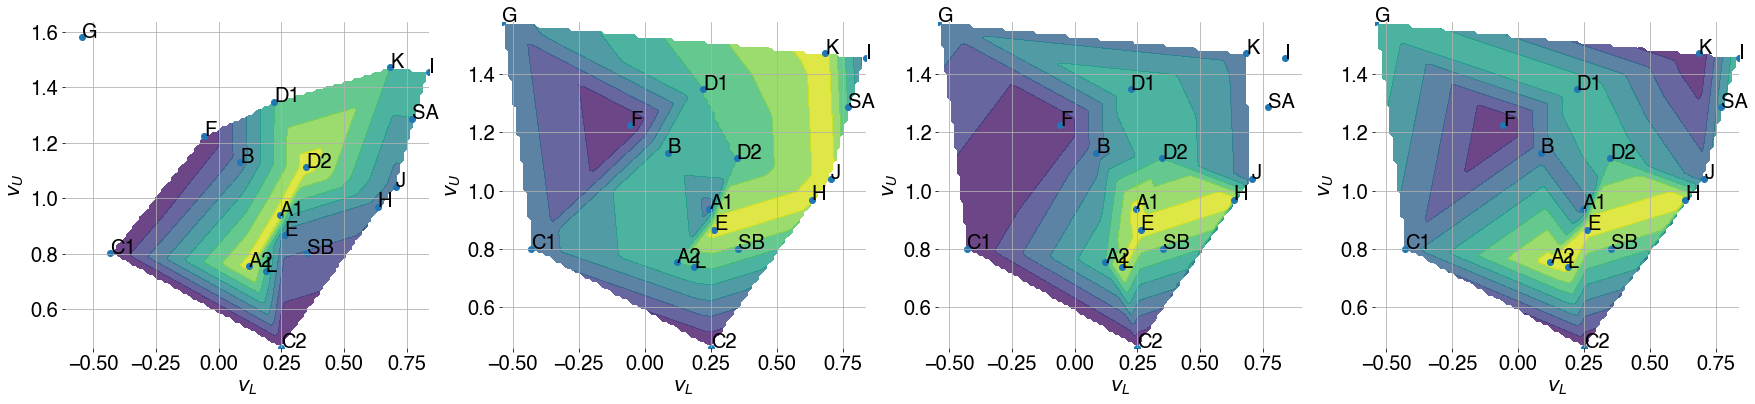

In [28]:
from scipy.interpolate import griddata

Score = [Expert_A_score,Expert_B_score,Expert_C_score,Expert_D_score]

fig = plt.figure(figsize=(30,6))

# Expert A
ax = plt.subplot(1,4,1)
x = np.linspace(np.min(model_parameters[np.array([0,1,2,3,4,5,7,8,9,10,11,12,13,14]),0]),
                np.max(model_parameters[np.array([0,1,2,3,4,5,7,8,9,10,11,12,13,14]),0]),100)
y = np.linspace(np.min(model_parameters[np.array([0,1,2,3,4,5,7,8,9,10,11,12,13,14]),1]),
                np.max(model_parameters[np.array([0,1,2,3,4,5,7,8,9,10,11,12,13,14]),1]),100)

X, Y = np.meshgrid(x,y)
px = model_parameters[np.array([0,1,2,3,4,5,7,8,9,10,11,12,13,14]),0]
py = model_parameters[np.array([0,1,2,3,4,5,7,8,9,10,11,12,13,14]),1]
Ti = griddata((px, py), Expert_A_score[np.array([0,1,2,3,4,5,7,8,9,10,11,12,13,14])], (X, Y), method='linear')
plt.contourf(X, Y, Ti, alpha=0.8)
plt.scatter(model_parameters[np.delete(np.arange(18),15),0],
            model_parameters[np.delete(np.arange(18),15),1])
for i in np.delete(np.arange(18),15):
    plt.text(model_parameters[i,0],model_parameters[i,1],subject_names[i],size=20)
plt.xlabel('$v_{\it{L}}}$',fontsize=20)
plt.ylabel('$v_{\it{U}}$',fontsize=20)

ax.tick_params(labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid()


# Expert B
ax = plt.subplot(1,4,2)
x = np.linspace(np.min(model_parameters[:-3,0]),np.max(model_parameters[:-3,0]),100)
y = np.linspace(np.min(model_parameters[:-3,1]),np.max(model_parameters[:-3,1]),100)

X, Y = np.meshgrid(x,y)
px = model_parameters[:-3,0]
py = model_parameters[:-3,1]
Ti = griddata((px, py), Expert_B_score, (X, Y), method='linear')
plt.contourf(X, Y, Ti, alpha=0.8)
plt.scatter(model_parameters[np.delete(np.arange(18),15),0],
            model_parameters[np.delete(np.arange(18),15),1])
for i in np.delete(np.arange(18),15):
    plt.text(model_parameters[i,0],model_parameters[i,1],subject_names[i],size=20)
plt.xlabel('$v_{\it{L}}}$',fontsize=20)
plt.ylabel('$v_{\it{U}}$',fontsize=20)

ax.tick_params(labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid()

ax = plt.subplot(1,4,3)
x = np.linspace(np.min(model_parameters[np.array([0,1,2,3,4,5,6,7,8,10,11,12,13,14]),0]),
                np.max(model_parameters[np.array([0,1,2,3,4,5,6,7,8,10,11,12,13,14]),0]),100)
y = np.linspace(np.min(model_parameters[np.array([0,1,2,3,4,5,6,7,8,10,11,12,13,14]),1]),
                np.max(model_parameters[np.array([0,1,2,3,4,5,6,7,8,10,11,12,13,14]),1]),100)

X, Y = np.meshgrid(x,y)
px = model_parameters[np.array([0,1,2,3,4,5,6,7,8,10,11,12,13,14]),0]
py = model_parameters[np.array([0,1,2,3,4,5,6,7,8,10,11,12,13,14]),1]
Ti = griddata((px, py), Expert_C_score[np.array([0,1,2,3,4,5,6,7,8,10,11,12,13,14])], (X, Y), method='linear')
plt.contourf(X, Y, Ti, alpha=0.8)
plt.scatter(model_parameters[np.delete(np.arange(18),15),0],
            model_parameters[np.delete(np.arange(18),15),1])
for i in np.delete(np.arange(18),15):
    plt.text(model_parameters[i,0],model_parameters[i,1],subject_names[i],size=20)
plt.xlabel('$v_{\it{L}}$',fontsize=20)
plt.ylabel('$v_{\it{U}}$',fontsize=20)

ax.tick_params(labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid()


# Expert A
ax = plt.subplot(1,4,4)
x = np.linspace(np.min(model_parameters[:-3,0]),np.max(model_parameters[:-3,0]),100)
y = np.linspace(np.min(model_parameters[:-3,1]),np.max(model_parameters[:-3,1]),100)

X, Y = np.meshgrid(x,y)
px = model_parameters[:-3,0]
py = model_parameters[:-3,1]
Ti = griddata((px, py), Expert_D_score, (X, Y), method='linear')
plt.contourf(X, Y, Ti, alpha=0.8)
plt.scatter(model_parameters[np.delete(np.arange(18),15),0],
            model_parameters[np.delete(np.arange(18),15),1])
for i in np.delete(np.arange(18),15):
    plt.text(model_parameters[i,0],model_parameters[i,1],subject_names[i],size=20)
plt.xlabel('$v_{\it{L}}$',fontsize=20)
plt.ylabel('$v_{\it{U}}$',fontsize=20)

ax.tick_params(labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid()

plt.savefig("./figures/parameter_plot.pdf", bbox_inches='tight')
plt.show()

### PCA of model parameter space

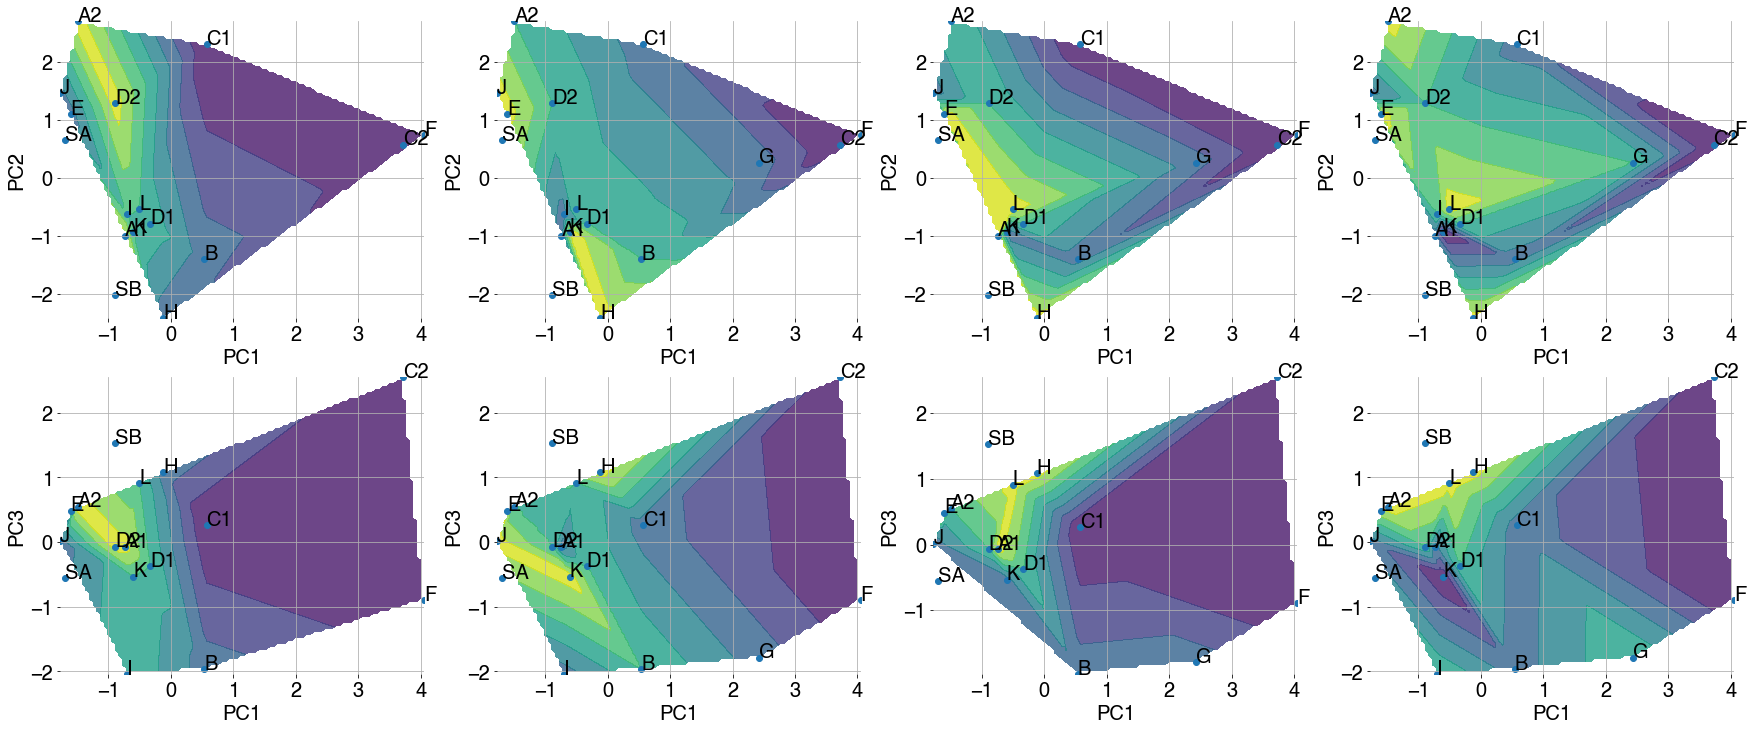

In [29]:
from sklearn.decomposition import PCA
from scipy.interpolate import griddata

# PCA of model parameters
pca = PCA(n_components=6)
X_pca = pca.fit_transform(model_parameters_standard)

# Plot PCA
fig = plt.figure(figsize=(30,12))

# PC1 vs PC2
PC0 = 0
PC1 = 1
PCA_axis = ['PC'+str(PC0+1),'PC'+str(PC1+1)]

# Expert A
ax = plt.subplot(2,4,1)
x = np.linspace(np.min(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='G')[0][0]),PC0]),
                np.max(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='G')[0][0]),PC0]),100)
y =  np.linspace(np.min(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='G')[0][0]),PC1]),
                  np.max(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='G')[0][0]),PC1]),100)
X, Y = np.meshgrid(x,y)
px = X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='G')[0][0]),PC0]
py = X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='G')[0][0]),PC1]
Ti = griddata((px, py), Expert_A_score[np.delete(np.arange(15),np.where(np.array(subject_names)=='G')[0][0])], (X, Y), method='linear')
plt.contourf(X, Y, Ti, alpha=0.8)

plt.scatter(X_pca[np.delete(np.arange(18),[np.where(np.array(subject_names)=='G')[0][0],15]),PC0],
            X_pca[np.delete(np.arange(18),[np.where(np.array(subject_names)=='G')[0][0],15]),PC1])
for i in np.delete(np.arange(18),[np.where(np.array(subject_names)=='G')[0][0],15]):
  plt.text(X_pca[i,PC0],X_pca[i,PC1],subject_names[i],size=20)
plt.xlabel(PCA_axis[0],fontsize=20)
plt.ylabel(PCA_axis[1],fontsize=20)
ax.tick_params(labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid()


# Expert B
ax = plt.subplot(2,4,2)
x = np.linspace(np.min(X_pca[:15,PC0]),
                np.max(X_pca[:15,PC0]),100)
y =  np.linspace(np.min(X_pca[:15,PC1]),
                  np.max(X_pca[:15,PC1]),100)
X, Y = np.meshgrid(x,y)
px = X_pca[:15,PC0]
py = X_pca[:15,PC1]
Ti = griddata((px, py), Expert_B_score[:15], (X, Y), method='linear')
plt.contourf(X, Y, Ti, alpha=0.8)

plt.scatter(X_pca[np.delete(np.arange(18),15),PC0],
            X_pca[np.delete(np.arange(18),15),PC1])
for i in np.delete(np.arange(18),15):
  plt.text(X_pca[i,PC0],X_pca[i,PC1],subject_names[i],size=20)
plt.xlabel(PCA_axis[0],fontsize=20)
plt.ylabel(PCA_axis[1],fontsize=20)
ax.tick_params(labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid()


# Expert C
ax = plt.subplot(2,4,3)
x = np.linspace(np.min(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='I')[0][0]),PC0]),
                np.max(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='I')[0][0]),PC0]),100)
y =  np.linspace(np.min(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='I')[0][0]),PC1]),
                  np.max(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='I')[0][0]),PC1]),100)
X, Y = np.meshgrid(x,y)
px = X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='I')[0][0]),PC0]
py = X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='I')[0][0]),PC1]
Ti = griddata((px, py), Expert_C_score[np.delete(np.arange(15),np.where(np.array(subject_names)=='I')[0][0])], 
              (X, Y), method='linear')
plt.contourf(X, Y, Ti, alpha=0.8)

plt.scatter(X_pca[np.delete(np.arange(18),[np.where(np.array(subject_names)=='I')[0][0],15]),PC0],
            X_pca[np.delete(np.arange(18),[np.where(np.array(subject_names)=='I')[0][0],15]),PC1])
for i in np.delete(np.arange(18),[np.where(np.array(subject_names)=='I')[0][0],15]):
  plt.text(X_pca[i,PC0],X_pca[i,PC1],subject_names[i],size=20)
plt.xlabel(PCA_axis[0],fontsize=20)
plt.ylabel(PCA_axis[1],fontsize=20)
ax.tick_params(labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid()


# Expert D
ax = plt.subplot(2,4,4)
x = np.linspace(np.min(X_pca[:15,PC0]),
                np.max(X_pca[:15,PC0]),100)
y =  np.linspace(np.min(X_pca[:15,PC1]),
                  np.max(X_pca[:15,PC1]),100)
X, Y = np.meshgrid(x,y)
px = X_pca[:15,PC0]
py = X_pca[:15,PC1]
Ti = griddata((px, py), Expert_D_score[:15], (X, Y), method='linear')
plt.contourf(X, Y, Ti, alpha=0.8)

plt.scatter(X_pca[np.delete(np.arange(18),15),PC0],X_pca[np.delete(np.arange(18),15),PC1])
for i in np.delete(np.arange(18),15):
  plt.text(X_pca[i,PC0],X_pca[i,PC1],subject_names[i],size=20)
plt.xlabel(PCA_axis[0],fontsize=20)
plt.ylabel(PCA_axis[1],fontsize=20)
ax.tick_params(labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid()


# PC1 vs PC3
PC0 = 0
PC1 = 2
PCA_axis = ['PC'+str(PC0+1),'PC'+str(PC1+1)]


# Expert A
ax = plt.subplot(2,4,5)
x = np.linspace(np.min(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='G')[0][0]),PC0]),
                np.max(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='G')[0][0]),PC0]),100)
y =  np.linspace(np.min(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='G')[0][0]),PC1]),
                  np.max(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='G')[0][0]),PC1]),100)
X, Y = np.meshgrid(x,y)
px = X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='G')[0][0]),PC0]
py = X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='G')[0][0]),PC1]
Ti = griddata((px, py), Expert_A_score[np.delete(np.arange(15),np.where(np.array(subject_names)=='G')[0][0])], (X, Y), method='linear')
plt.contourf(X, Y, Ti, alpha=0.8)

plt.scatter(X_pca[np.delete(np.arange(18),[np.where(np.array(subject_names)=='G')[0][0],15]),PC0],
            X_pca[np.delete(np.arange(18),[np.where(np.array(subject_names)=='G')[0][0],15]),PC1])
for i in np.delete(np.arange(18),[np.where(np.array(subject_names)=='G')[0][0],15]):
  plt.text(X_pca[i,PC0],X_pca[i,PC1],subject_names[i],size=20)
plt.xlabel(PCA_axis[0],fontsize=20)
plt.ylabel(PCA_axis[1],fontsize=20)
ax.tick_params(labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid()


# Expert B
ax = plt.subplot(2,4,6)
x = np.linspace(np.min(X_pca[:15,PC0]),
                np.max(X_pca[:15,PC0]),100)
y =  np.linspace(np.min(X_pca[:15,PC1]),
                  np.max(X_pca[:15,PC1]),100)
X, Y = np.meshgrid(x,y)
px = X_pca[:15,PC0]
py = X_pca[:15,PC1]
Ti = griddata((px, py), Expert_B_score[:15], (X, Y), method='linear')
plt.contourf(X, Y, Ti, alpha=0.8)

plt.scatter(X_pca[np.delete(np.arange(18),15),PC0],
            X_pca[np.delete(np.arange(18),15),PC1])
for i in np.delete(np.arange(18),15):
  plt.text(X_pca[i,PC0],X_pca[i,PC1],subject_names[i],size=20)
plt.xlabel(PCA_axis[0],fontsize=20)
plt.ylabel(PCA_axis[1],fontsize=20)
ax.tick_params(labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid()


# Expert C
ax = plt.subplot(2,4,7)
x = np.linspace(np.min(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='I')[0][0]),PC0]),
                np.max(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='I')[0][0]),PC0]),100)
y =  np.linspace(np.min(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='I')[0][0]),PC1]),
                  np.max(X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='I')[0][0]),PC1]),100)
X, Y = np.meshgrid(x,y)
px = X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='I')[0][0]),PC0]
py = X_pca[np.delete(np.arange(15),np.where(np.array(subject_names)=='I')[0][0]),PC1]
Ti = griddata((px, py), Expert_C_score[np.delete(np.arange(15),np.where(np.array(subject_names)=='I')[0][0])], (X, Y), method='linear')
plt.contourf(X, Y, Ti, alpha=0.8)

plt.scatter(X_pca[np.delete(np.arange(18),[np.where(np.array(subject_names)=='I')[0][0],15]),PC0],
            X_pca[np.delete(np.arange(18),[np.where(np.array(subject_names)=='I')[0][0],15]),PC1])
for i in np.delete(np.arange(18),[np.where(np.array(subject_names)=='I')[0][0],15]):
  plt.text(X_pca[i,PC0],X_pca[i,PC1],subject_names[i],size=20)
plt.xlabel(PCA_axis[0],fontsize=20)
plt.ylabel(PCA_axis[1],fontsize=20)
ax.tick_params(labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid()


# Expert D
ax = plt.subplot(2,4,8)
x = np.linspace(np.min(X_pca[:15,PC0]),
                np.max(X_pca[:15,PC0]),100)
y =  np.linspace(np.min(X_pca[:15,PC1]),
                  np.max(X_pca[:15,PC1]),100)
X, Y = np.meshgrid(x,y)
px = X_pca[:15,PC0]
py = X_pca[:15,PC1]
Ti = griddata((px, py), Expert_D_score[:15], (X, Y), method='linear')
plt.contourf(X, Y, Ti, alpha=0.8)

plt.scatter(X_pca[np.delete(np.arange(18),15),PC0],
            X_pca[np.delete(np.arange(18),15),PC1])
for i in np.delete(np.arange(18),15):
  plt.text(X_pca[i,PC0],X_pca[i,PC1],subject_names[i],size=20)
plt.xlabel(PCA_axis[0],fontsize=20)
plt.ylabel(PCA_axis[1],fontsize=20)
ax.tick_params(labelsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid()


# plt.tight_layout()
plt.savefig("./figures/parameter_pca.pdf", bbox_inches='tight')
plt.show()

# Miscellaneous figure items used in the manuscript

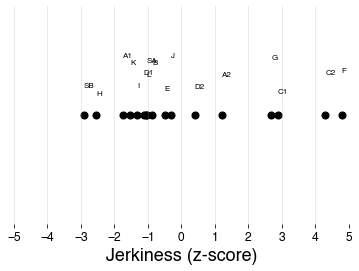

In [30]:
# Jerkiness feature

PC0 = 0
PC1 = 1
PC2 = 2
PCA_axis = ['PC1','PC2','PC3']

ax = plt.subplot(1,1,1)
ax_ = np.array([1,1])
proj_ = []

for i in np.delete(np.arange(18),15):
    proj_.append(np.dot(ax_,np.hstack((X_pca[:,PC0][i],X_pca[:,PC1][i]))))

ax.scatter(proj_,np.zeros(len(proj_)),s=50,c='k')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.xlabel('Jerkiness (z-score)',fontsize=18)
ax.tick_params(labelsize=12)
ax.get_xaxis().set_ticks([-5,-4,-3,-2,-1,0,1,2,3,4,5])
ax.get_yaxis().set_ticks([])
ax.set_xlim([-5,5])
plt.grid(alpha=0.3)

plt.savefig("./figures/jerkiness.pdf", bbox_inches='tight')

for i in range(len(proj_)):
    plt.text(proj_[i],
             np.zeros(len(proj_))[i]+0.01+0.02*np.random.rand(),
             np.delete(np.array(subject_names),15)[i],size=8)

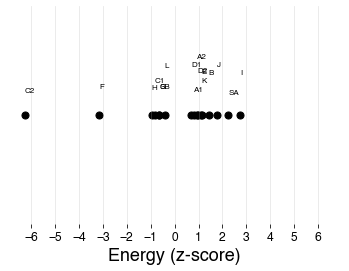

In [31]:
# Energy feature

ax = plt.subplot(1,1,1)
ax_ = np.array([-1,-1])
proj_ = []

for i in np.delete(np.arange(18),15):
    proj_.append(np.dot(ax_,np.hstack((X_pca[:,PC0][i],X_pca[:,PC2][i]))))

ax.scatter(proj_,np.zeros(len(proj_)),s=50,c='k')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.xlabel('Energy (z-score)',fontsize=18)
ax.tick_params(labelsize=12)
ax.get_xaxis().set_ticks([-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6])
ax.get_yaxis().set_ticks([])
ax.set_xlim([-7,7])
plt.grid(alpha=0.3)

plt.savefig("./figures/energy.pdf", bbox_inches='tight')

for i in range(len(proj_)):
    plt.text(proj_[i],
             np.zeros(len(proj_))[i]+0.01+0.02*np.random.rand(),
             np.delete(np.array(subject_names),15)[i],size=8)

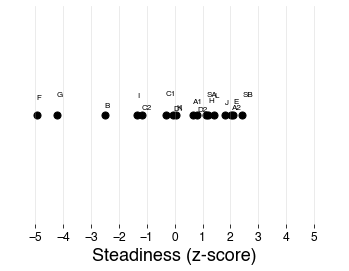

In [32]:
# Steadiness feature

ax = plt.subplot(1,1,1)
ax_ = np.array([-1,1])
proj_ = []

for i in np.delete(np.arange(18),15):
    proj_.append(np.dot(ax_,np.hstack((X_pca[:,PC0][i],X_pca[:,PC2][i]))))

ax.scatter(proj_,np.zeros(len(proj_)),s=50,c='k')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.xlabel('Steadiness (z-score)',fontsize=18)
ax.tick_params(labelsize=12)
ax.get_xaxis().set_ticks([-5,-4,-3,-2,-1,0,1,2,3,4,5])
ax.get_yaxis().set_ticks([])
ax.set_xlim([-6,6])
plt.grid(alpha=0.3)

plt.savefig("./figures/steadiness.pdf", bbox_inches='tight')

for i in range(len(proj_)):
    plt.text(proj_[i],
             np.zeros(len(proj_))[i]+0.01*np.random.rand(),
             np.delete(np.array(subject_names),15)[i],size=8)

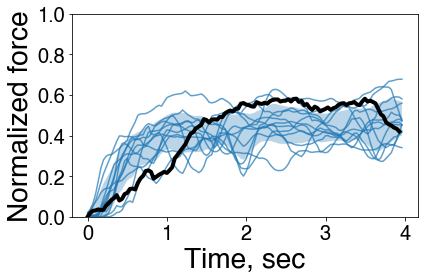

In [33]:
# Mini-Plot of synthetic force vs actual measurement

subject_of_interest = 'D2'
t = np.arange(0,(T)*dt,dt)

for subject in np.where(np.array(subject_names)==subject_of_interest)[0]:
    
    for i in range(1):
        
        m_ = Models[subject]
        
        virtual_velocity_sample, _ = m_.sample(T)
        virtual_velocity_sample = virtual_velocity_sample.reshape(-1)
        
        Z = [np.array([0,0,1])]
        Y = []
        for i in range(virtual_velocity_sample.shape[0]-1):
            z, y = step(Z[-1],virtual_velocity_sample[i],dt)
            Z.append(z)
            Y.append(y)
        
        data_mean1 = np.mean(force[subject][:,:T],axis=0)
        data_std1 = np.std(force[subject][:,:T],axis=0)
        plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, alpha=0.3)
    
        for i in range(force[subject].shape[0]):
            plt.plot(t,force[subject][i,:T], color='tab:blue',alpha=0.7)
        
        plt.plot(t[:-1],np.array(Y),lw=4,c='k')
            
        plt.ylabel('Normalized force',size=28)
        plt.xlabel('Time, sec',size=28)
        plt.xticks(ticks=[0,1,2,3,4],size=20)
        plt.yticks(size=20)
        plt.ylim([0,1])
        
        plt.tight_layout()
        plt.savefig('./figures/'+str(subject_of_interest)+'_mini.pdf')
        plt.show()

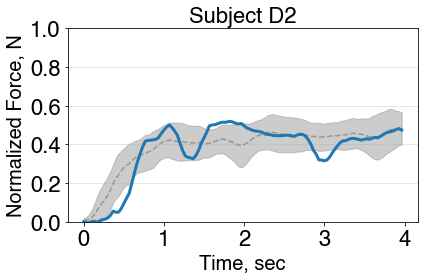

In [34]:
subject_of_interest = 'D2'
subj_ = np.where(np.array(subject_names)==subject_of_interest)[0][0]

data_mean1 = np.mean(force[subj_][:,:T],axis=0)
data_std1 = np.std(force[subj_][:,:T],axis=0)
plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, color='grey', alpha=0.4)
plt.plot(t,data_mean1,'--',color='grey',alpha=0.7)

plt.plot(t,force[subj_][2,:T],lw=3)
plt.title('Subject '+str(subject_of_interest), fontsize=22)
plt.xlabel('Time, sec', fontsize=20)
plt.ylabel('Normalized Force, N', fontsize=20)
plt.ylim([0,1])

plt.tick_params(labelsize=22)
plt.xticks([0,1,2,3,4])
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
plt.grid(axis='y',alpha=0.4)
plt.tight_layout()
plt.savefig('./figures/'+str(subject_of_interest)+'_re-tension.pdf') 

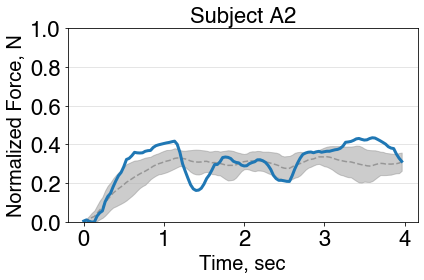

In [35]:
subject_of_interest = 'A2'
subj_ = np.where(np.array(subject_names)==subject_of_interest)[0][0]

data_mean1 = np.mean(force[subj_][:,:T],axis=0)
data_std1 = np.std(force[subj_][:,:T],axis=0)
plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, color='grey', alpha=0.4)
plt.plot(t,data_mean1,'--',color='grey',alpha=0.7)

plt.plot(t,force[subj_][2,:T],lw=3)
plt.title('Subject '+str(subject_of_interest), fontsize=22)
plt.xlabel('Time, sec', fontsize=20)
plt.ylabel('Normalized Force, N', fontsize=20)
plt.ylim([0,1])

plt.tick_params(labelsize=22)
plt.xticks([0,1,2,3,4])
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
plt.grid(axis='y',alpha=0.4)
plt.tight_layout()
plt.savefig('./figures/'+str(subject_of_interest)+'_re-tension.pdf')

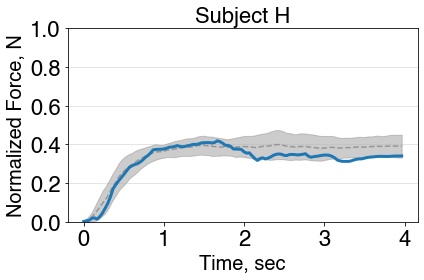

In [36]:
subject_of_interest = 'H'
subj_ = np.where(np.array(subject_names)==subject_of_interest)[0][0]

data_mean1 = np.mean(force[subj_][:,:T],axis=0)
data_std1 = np.std(force[subj_][:,:T],axis=0)
plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, color='grey', alpha=0.4)
plt.plot(t,data_mean1,'--',color='grey',alpha=0.7)

plt.plot(t,force[subj_][2,:T],lw=3)
plt.title('Subject '+str(subject_of_interest), fontsize=22)
plt.xlabel('Time, sec', fontsize=20)
plt.ylabel('Normalized Force, N', fontsize=20)
plt.ylim([0,1])

plt.tick_params(labelsize=22)
plt.xticks([0,1,2,3,4])
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
plt.grid(axis='y',alpha=0.4)
plt.tight_layout()
plt.savefig('./figures/'+str(subject_of_interest)+'_re-tension.pdf')

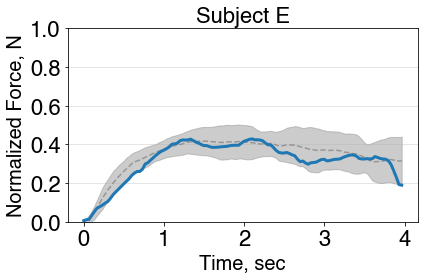

In [37]:
subject_of_interest = 'E'
subj_ = np.where(np.array(subject_names)==subject_of_interest)[0][0]

data_mean1 = np.mean(force[subj_][:,:T],axis=0)
data_std1 = np.std(force[subj_][:,:T],axis=0)
plt.fill_between(t,data_mean1+data_std1,data_mean1-data_std1, color='grey', alpha=0.4)
plt.plot(t,data_mean1,'--',color='grey',alpha=0.7)

plt.plot(t,force[subj_][3,:T],lw=3)
plt.title('Subject '+str(subject_of_interest), fontsize=22)
plt.xlabel('Time, sec', fontsize=20)
plt.ylabel('Normalized Force, N', fontsize=20)
plt.ylim([0,1])

plt.tick_params(labelsize=22)
plt.xticks([0,1,2,3,4])
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0])
plt.grid(axis='y',alpha=0.4)
plt.tight_layout()
plt.savefig('./figures/'+str(subject_of_interest)+'_re-tension.pdf')

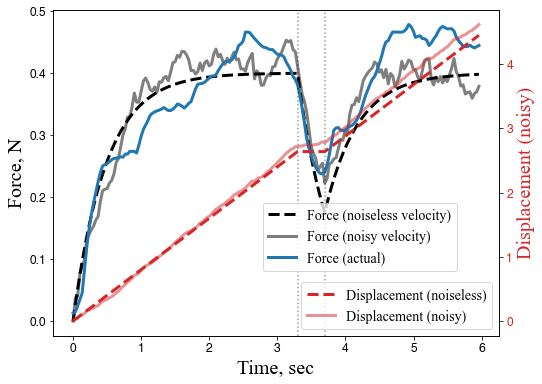

In [38]:
import matplotlib.font_manager as font_manager
csfont = {'fontname':'Times New Roman'}
font = font_manager.FontProperties(family='Times New Roman',
                                   weight='normal',
                                   style='normal', size=14)

N = 180
t = np.arange(0,N*0.0333,0.0333)
v = np.ones(N)*0.8
# v[np.max(np.where(t<1)[0]):] = 1
v[np.max(np.where(t<3.3)[0]):] = 0
v[np.max(np.where(t<3.7)[0]):] = 0.8
v_noise = v + 0.35*np.random.randn(N)

state = [np.array([0,0,1])]
output = []

state_noise = [np.array([0,0,1])]
output_noise = []

for i in range(v.shape[0]):
    
    x, y = step(state[-1],v[i],0.0333)
    state.append(x)
    output.append(y)
    
    x, y = step(state_noise[-1],v_noise[i],0.0333)
    state_noise.append(x)
    output_noise.append(y)

fig, ax1 = plt.subplots(figsize=(8,6))
plt.plot(t,np.array(output),'--',lw=3,c='k',label='Force (noiseless velocity)')
plt.plot(t,np.array(output_noise),lw=3,c='k',alpha=0.5,
        label='Force (noisy velocity)')
plt.plot(t,force[4][0,:],lw=3,label='Force (actual)')
ax1.set_ylabel('Force, N',**csfont,c='k',size=20)
ax1.tick_params(labelcolor='k',labelsize=12)
ax1.set_xlabel('Time, sec',**csfont,size=20)
ax1.axvline(x=3.3,ls=':',c='k',alpha=0.4)
ax1.axvline(x=3.7,ls=':',c='k',alpha=0.4)
plt.legend(prop=font,loc=(0.47,0.2))

ax2 = ax1.twinx()
plt.plot(t,np.array(state)[:-1,1],'--',c='C3',lw=3,
         label='Displacement (noiseless)')
ax2.set_ylabel('Displacement (noisy)',**csfont,c='C3',size=20)
ax2.tick_params(labelcolor='C3',labelsize=12)
plt.plot(t,np.array(state_noise)[:-1,1],c='C3',lw=3,alpha=0.5,
        label='Displacement (noisy)')

plt.legend(prop=font,loc='lower right')

fig.savefig("./figures/model_demo.pdf", bbox_inches='tight')

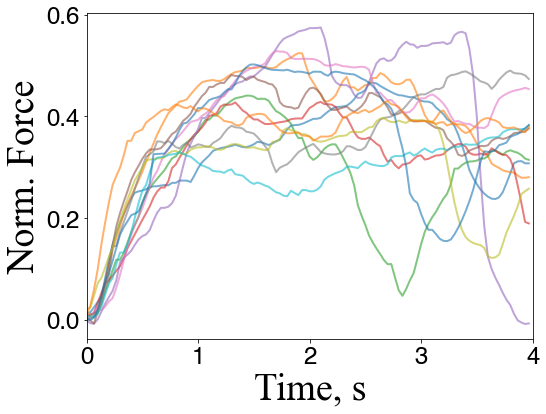

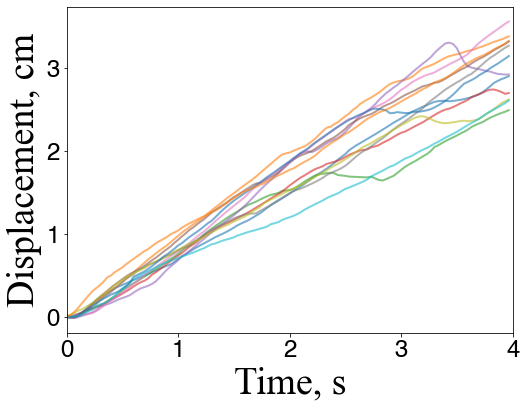

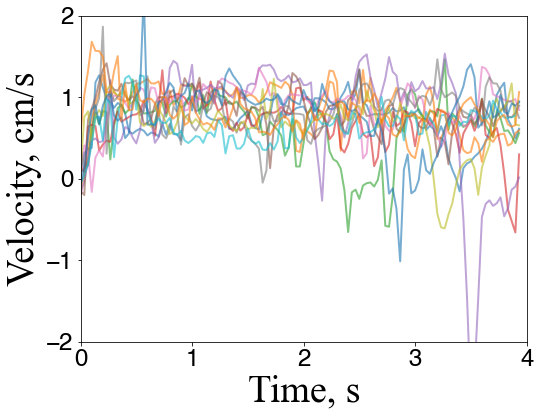

In [39]:
import matplotlib.font_manager as font_manager

subject_of_interest = 4
t = np.arange(0,T*dt,dt)

csfont = {'fontname':'Times New Roman'}
font = font_manager.FontProperties(family='Times New Roman',
                                   weight='normal',
                                   style='normal', size=14)

plt.figure(figsize=(8,6))
for cut in range(Num_cuts):
    plt.plot(t,force[subject_of_interest][cut,:T],lw=2,alpha=0.6)
plt.ylabel('Norm. Force',**csfont,c='k',size=38)
plt.xlabel('Time, s',**csfont,c='k',size=38)
plt.tick_params(labelsize=24)
plt.xlim([0,4])
plt.savefig("./figures/overview_force.pdf", bbox_inches='tight')
plt.show()

plt.figure(figsize=(8,6))
for cut in range(Num_cuts):
    plt.plot(t,virtual_displacement[subject_of_interest][cut,:T],lw=2,alpha=0.6)
plt.ylabel('Displacement, cm',**csfont,c='k',size=38)
plt.xlabel('Time, s',**csfont,c='k',size=38)
plt.tick_params(labelsize=24)
plt.xlim([0,4])
plt.savefig("./figures/overview_displacement.pdf", bbox_inches='tight')
plt.show()
    
plt.figure(figsize=(8,6))
for cut in range(Num_cuts):
    plt.plot(t[:-1],virtual_velocity[subject_of_interest][cut,:T-1],lw=2,alpha=0.6)
plt.ylabel('Velocity, cm/s',**csfont,c='k',size=38)
plt.xlabel('Time, s',**csfont,c='k',size=38)
plt.tick_params(labelsize=24)
plt.ylim([-2,2])
plt.xlim([0,4])
plt.savefig("./figures/velocity.pdf", bbox_inches='tight')
plt.show()

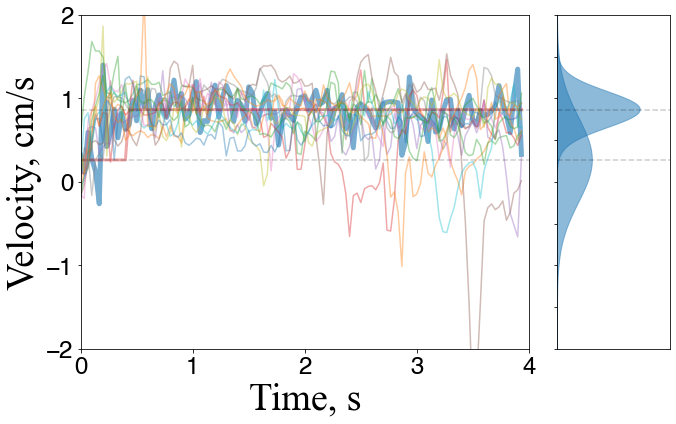

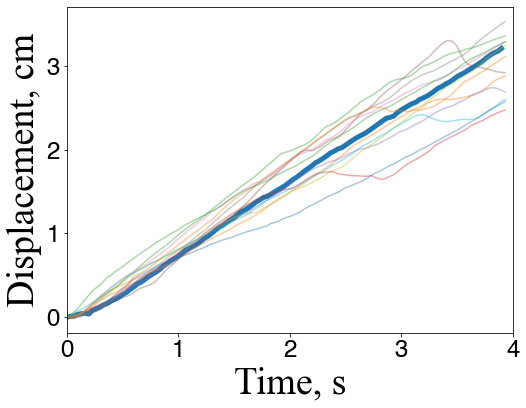

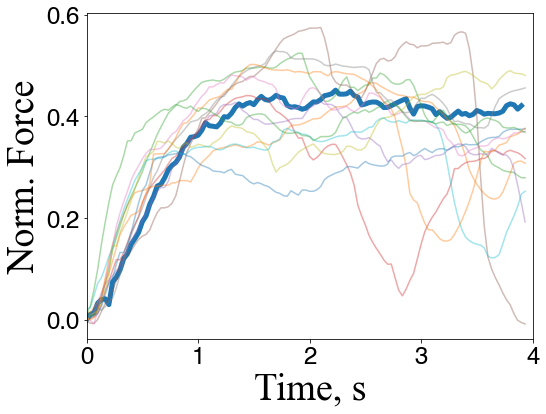

In [40]:
from scipy.stats import norm

t = np.arange(0,T*dt-dt,dt)
m_ = Models[subject_of_interest]

virtual_velocity_sample, regime = m_.sample(T-1)
virtual_velocity_sample = virtual_velocity_sample.reshape(-1)

fig, ax = plt.subplots(1, 2, figsize=(9.5,6), gridspec_kw={'width_ratios': [4, 1]})

ax[0].plot(t[:],virtual_velocity_sample,lw=5,alpha=0.6)
ax[0].plot(t[:],m_.means_[regime].reshape(-1),lw=3,c='C3',alpha=0.4)
if subject_of_interest == 2:
    plt.legend(['latent strain rate','strain rate emission'])
    
for cut in range(Num_cuts):
    ax[0].plot(t,virtual_velocity[subject_of_interest][cut,:], alpha=0.4)

ax[0].set_ylabel('Velocity, cm/s',**csfont,size=38)
ax[0].set_xlabel('Time, s',**csfont,size=38)

Z = [np.array([0,0,1])]
Y = []
for i in range(virtual_velocity_sample.shape[0]-1):
    z, y = step(Z[-1],virtual_velocity_sample[i],0.0333)
    Z.append(z)
    Y.append(y)
ax[0].set_ylim([-2,2])
ax[0].set_xlim([0,4])


x_axis = np.arange(-3, 3, 0.001)
for i in range(K):
    ax[1].fill(norm.pdf(x_axis,Models[subject_of_interest].means_[i],np.sqrt(Models[subject_of_interest].covars_[i])).reshape(-1), 
           x_axis,
           alpha=0.5,
           c='C0')

ax[1].set_xlim([0,2.5])
ax[1].set_ylim([-2,2])

for i in range(K):
    ax[0].axhline(y=Models[subject_of_interest].means_[i],ls='--',c='k',alpha=0.2)
    ax[1].axhline(y=Models[subject_of_interest].means_[i],ls='--',c='k',alpha=0.2)

ax[0].tick_params(labelsize=24)
ax[1].yaxis.set_ticklabels([])
ax[1].xaxis.set_ticklabels([])
ax[1].xaxis.set_ticks([])

plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0) 
plt.savefig("./figures/overview_velocity_gen.pdf", bbox_inches='tight')
plt.show()


plt.figure(figsize=(8,6))
plt.plot(t[:-1],np.array(Z)[:-1,1],lw=5)

for cut in range(Num_cuts):
    plt.plot(t,virtual_displacement[subject_of_interest][cut,:-1], alpha=0.4)
plt.ylabel('Displacement, cm',**csfont,size=38)
plt.xlabel('Time, s',**csfont,size=38)
plt.xlim([0,4])
plt.tick_params(labelsize=24)
plt.savefig("./figures/overview_displacement_gen.pdf", bbox_inches='tight')
plt.show()


plt.figure(figsize=(8,6))
plt.plot(t[:-1],np.array(Y),lw=5)

for cut in range(Num_cuts):
    plt.plot(t,force[subject_of_interest][cut,:T-1], alpha=0.4)
plt.ylabel('Norm. Force',**csfont,size=38)
plt.xlabel('Time, s',**csfont,size=38)
plt.xlim([0,4])
plt.tick_params(labelsize=24)
plt.savefig("./figures/overview_force_gen.pdf", bbox_inches='tight')
plt.show()

C:\Users\honeycomb0\Miniconda3\envs\main\lib\site-packages\ipykernel_launcher.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\honeycomb0\Miniconda3\envs\main\lib\site-packages\ipykernel_launcher.py:64: UserWarning: FixedFormatter should only be used together with FixedLocator


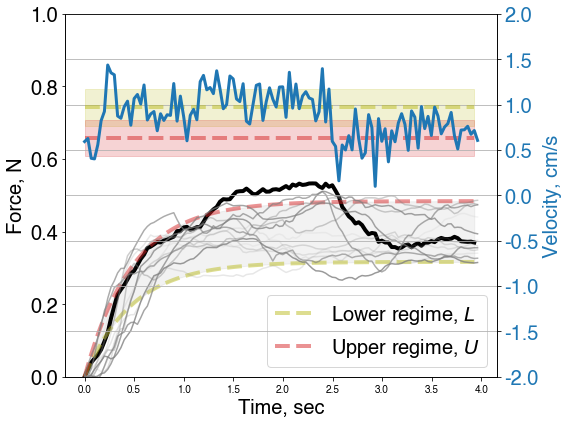

In [41]:
subject_of_interest = 'H' # change designator here, e.g. 'D2' or 'H'
t = np.arange(0,(T)*dt,dt)

subj_ = np.where(np.array(subject_names)==subject_of_interest)[0][0]
m_ = Models[subj_]

# Sample the virtual velocity from the model
virtual_velocity_sample, _ = m_.sample(T)
virtual_velocity_sample = virtual_velocity_sample.reshape(-1)

fig, ax1 = plt.subplots(figsize=(8,6))
ax2 = ax1.twinx()

# Integrate Maxwell model
Z = [np.array([0,0,1])] # hidden state
Y = []
for i in range(virtual_velocity_sample.shape[0]-1):
    z, y = step(Z[-1],virtual_velocity_sample[i],dt)
    Z.append(z)
    Y.append(y)

# Generate envelope
Z = [np.array([0,0,1])]
Y_top = []
for i in range(virtual_velocity_sample.shape[0]-1):
    z, y = step(Z[-1],model_parameters[subj_,0],dt)
    Z.append(z)
    Y_top.append(y)

Z = [np.array([0,0,1])]
Y_bot = []
for i in range(virtual_velocity_sample.shape[0]-1):
    z, y = step(Z[-1],model_parameters[subj_,1],dt)
    Z.append(z)
    Y_bot.append(y)


ax1.plot(t[:-1],np.array(Y),lw=4,c='k')

ax1.plot(t[:-1],np.array(Y_top),ls='--',lw=4,label='Lower regime, $\it{L}$',alpha=0.5,c=colors[8])
ax1.plot(t[:-1],np.array(Y_bot),ls='--',lw=4,label='Upper regime, $\it{U}$',alpha=0.5,c=colors[3])

ax1.fill_between(t[:-1],y1=np.array(Y_top),y2=np.array(Y_bot),color='gray',alpha=0.1)
for i in range(force[subj_].shape[0]):
    ax1.plot(t,force[subj_][i,:T], alpha=np.random.rand()*0.8, c='gray')

ax1.set_ylabel('Force, N',size=20,c='k')
ax1.set_xlabel('Time, sec',size=20)
ax1.set_yticklabels(np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0]), fontsize=20, c='k')
ax1.set_ylim([0,1])
ax1.legend(loc='lower right',fontsize=20)


ax2.fill_between(t[:-1],y1=m_.means_[0]+np.sqrt(model_parameters[subj_,2]),y2=m_.means_[0]-np.sqrt(model_parameters[subj_,2]),alpha=0.2,color=colors[8])
ax2.plot(t[:-1],np.ones(t[:-1].shape[0])*m_.means_[0],lw=4,ls='--',alpha=0.5,color=colors[8])

ax2.fill_between(t[:-1],y1=m_.means_[1]+np.sqrt(model_parameters[subj_,3]),y2=m_.means_[1]-np.sqrt(model_parameters[subj_,3]),alpha=0.2,color=colors[3])
ax2.plot(t[:-1],np.ones(t[:-1].shape[0])*m_.means_[1],lw=4,ls='--',alpha=0.5,color=colors[3])

ax2.plot(t,virtual_velocity_sample,lw=3,alpha=1,color=colors[0])

ax2.set_ylabel('Velocity, cm/s',size=20,c=colors[0])
ax2.set_xlabel('Time, sec',size=20)
ax2.set_yticklabels(np.arange(-2,2.5,0.5), fontsize=20, c=colors[0])
ax2.set_ylim([-2,2])

plt.tight_layout()
plt.grid(axis='y')
plt.savefig('./figures/'+str(subject_of_interest)+"_model_parameters_plot.pdf", bbox_inches='tight')
plt.show()